# Сводный проект

## Описание проекта

<li>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<li>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<li>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Инструкция по выполнению проекта <br>
Шаг 1. Откройте файл с данными и изучите общую информацию<br>
Путь к файлу: /datasets/games.csv <br>
Шаг 2. Подготовьте данные<br>

    Замените названия столбцов (приведите к нижнему регистру);
    Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    Обработайте пропуски при необходимости:
      
        Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
        Опишите причины, которые могли привести к пропускам;
        Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных

    Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    Не учитывайте в работе данные за предыдущие годы.
    Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    Соотнесите выводы с продажами игр на других платформах.
    Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    Самые популярные жанры (топ-5). Поясните разницу.
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

    Как вы сформулировали нулевую и альтернативную гипотезы;
    Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.
Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('games.csv', sep=',')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

### 1. Изменение названий столбоцов и приведение их к нижнему регистру

In [5]:
data.columns = map(str.lower, data.columns)

Проверим изменения

In [6]:
data.columns.unique()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2. Преобразование типов данных 

In [7]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из информации о таблице можно сделать вывод, что необходимо изменить тип данных в столбцах:
<ol>
    <li> year_of_release - год релиза - целое число, приведем к формату int </li>
    <li> critic_score - Оценка критиков до 100 - не является дробным показателем, приведем к формату int </li>
    <li> user_score - Оценка пользователей - Является дробным показателем, приведем к формату float </li>

Прежде чем менять форматы необходимо разобраться с пропущенными данными.

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
data.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Считаю, что пустые данные в столбце с годом выпуска можно исключить из датафрейма так как заполнить мы их логически ничем не можем, а пустые данные будут мешать дальнейшим исследованиям 

In [10]:
data = data.dropna(subset = ['year_of_release']).reset_index(drop=True)

После исключения пустых значкений меняем тип данных на целочисленный 

In [11]:
data.year_of_release = data.year_of_release.astype(int)

Разберемся с оценками критиков. В данном столбце указана оценка в пределах до 100. Дробные числа там не предполагаются. Есть проблема с отстутствующими данными в этом столбце. Логически заполнить пустоту медианой или средним не получится. Избавляться от строк с пустыми данными не рационально. Предлагаю заполнить пустоты в этом столбце значением "-1" Таким образом для нас это будет маркером того, что данных там не было, а сами строки можно будет принимать в работу для дальнейшего анализа

In [12]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
data.critic_score = data.critic_score.fillna(-1)

После обработки отсутствующих данных можно изменить тип данных на целочисленный

In [14]:
data.critic_score = data.critic_score.astype(int)

In [15]:
data.critic_score.unique()

array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

Теперь разберемся с оценками пользователей. в данном стобце есть следующие проблемы: есть отсутствующие значения и есть аббревеатура "TBD", что означает to be determined (будет определено). Также есть оценки равные 0. Предлагаю заменить пустые значения "-1" как в случае с оценкой критиков. А также предлагаю заменить аббревиатуру TBD на "-2" для нас это также будет являться маркером. Пустых строек и строчек содержжащих tbd очень много, чтобы от них избавляться, а логическую замену отражающую действительность найти невозможно.

In [16]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
data.user_score=data.user_score.fillna(-1)

In [18]:
data.loc[data['user_score']== "tbd",'user_score'] = -2

In [19]:
data.user_score.unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', -2, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
data.user_score = data.user_score.astype(float)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int32  
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


На этом переработку типов данных можно считать завершенной

### 3. Обработка пропусков 

При изменении типов данных мы уже частично заполнили пропуски. Проверим, в каких столбцах еще остались пропуски

In [22]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6678
dtype: int64

Остались данные по названию игры, жанру и рейтинг. Разберем каждый случай подробнее

In [23]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,NaN


Отфильтровав значения по столбцу name можно увидеть, что тут также не хватает данных по жанру и были пропуски по оценкам критиков и пользователей. Слишком много пустых значений. считаю, что с этими строками можно попрощаться со спокойной душой.

In [24]:
data = data.dropna(subset = ['name']).reset_index(drop=True)

In [25]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Осталось разобравться только с рейтингом игр

In [26]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
data.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Весьма интересно то, что при подсчете значений особенно выделяются такие рейтинги как : EC -(«Early childhood») — «Для детей младшего возраста» , K-A - Kids to Adults (K-A), AO - («Adults Only 18+») — «Только для взрослых»: , RP - («Rating Pending») — «Рейтинг ожидается». Рейтинг игры  K-A - Kids to Adults давно устарел, в настоящее время он изменене орагнизацией на рейтинг "E". Изменим этот рейтинг. Пустых значений очень много, заменить их логически каким-то одним жанорм не получится. А других критериев, по которым можно было бы зполнить пустоты в датафрейме отсутствуют. Запомним пустоты значением "undefined"

In [28]:
data.loc[data['rating']== "K-A",'rating'] = "E"

In [29]:
data.rating = data.rating.fillna("undefined")

In [30]:
data.rating.value_counts()

undefined    6676
E            3924
T            2905
M            1536
E10+         1393
EC              8
AO              1
RP              1
Name: rating, dtype: int64

### Проверка дубликатов

In [31]:
data.duplicated().sum()

0

### 4. Подсчет суммарных продаж во всех регионах

Создадим новый столбец "total_sales" где будет содержаться суммарная продажа по всем регионам

In [32]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,undefined,31.38


In [98]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9839 entries, 0 to 16435
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9839 non-null   object 
 1   platform         9839 non-null   object 
 2   year_of_release  9839 non-null   int32  
 3   genre            9839 non-null   object 
 4   na_sales         9839 non-null   float64
 5   eu_sales         9839 non-null   float64
 6   jp_sales         9839 non-null   float64
 7   other_sales      9839 non-null   float64
 8   critic_score     9839 non-null   int32  
 9   user_score       9839 non-null   float64
 10  rating           9839 non-null   object 
 11  total_sales      9839 non-null   float64
dtypes: float64(6), int32(2), object(4)
memory usage: 922.4+ KB
None
-------------------------
name [' Tales of Xillia 2' '.hack//Infection Part 1' '.hack//Mutation Part 2'
 ... 'thinkSMART: Chess for Kids' 'uDraw Studio'
 'uDraw Studio: Instant Ar

## Исследовательский анализ данных

### 1. Количество игр по годам

Рассмотрим, количество выпущенных игр в разрезе по годам

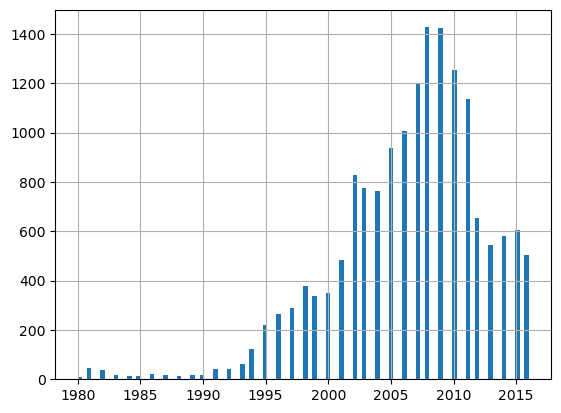

In [35]:
data.year_of_release.hist(bins = 100);

В полученной гистограмме можно заметить, что пик выпущенных игр приходится на 2005-2010 года. Логично, что геймдейв развивается по всему миру и количество игр растет с каждым годом все больше. Однако, смущет провал по выпущенным играм после 2012 года. Это можно объяснить тем, что с течением времени разработчики стали делать больший упор на качество, а не на количество выпущенных игр. А качестко, как правило, требует бОльших затрат времени. Актуальным периодом для рассмотрения стоит взять с 1995 года. Так как этот период смотрится наиболее важным и актуальным в контексте рассматриваемой темы.

### 2. Количество игр на различных платформах

Рассмотрим, как менялись продажи по платформам

Для начала, посмотрим на количество игр выпущенных на различных платформах

In [36]:
data.platform.value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

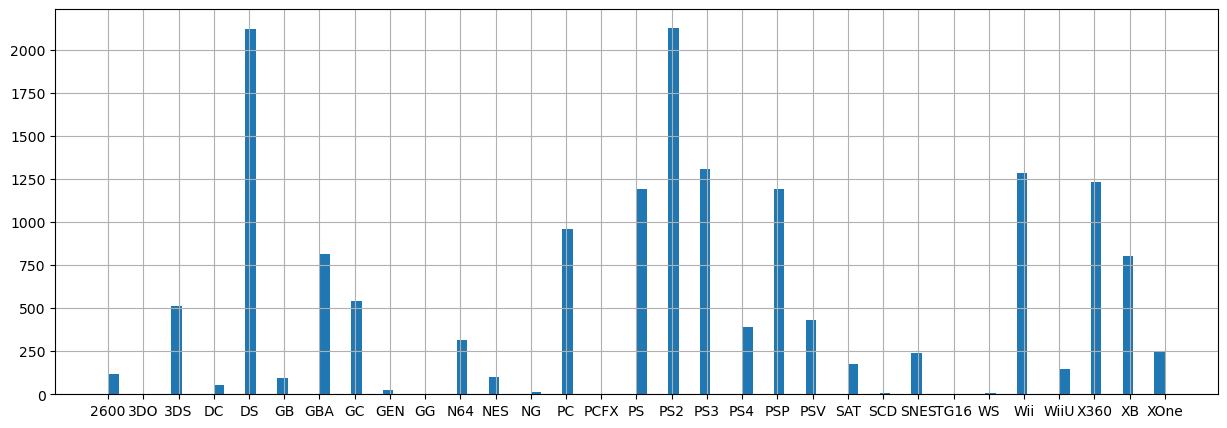

In [37]:
data.sort_values(by = 'platform').platform.hist(bins=100, figsize=(15,5));

Явными лидерами по выпущенным играм являются: ps2, nintendo DS, ps3, nintendo wii, xbox 360. Создадим отдельный датафрейм с платформами на которых чаще всего выходили игры

In [38]:
top5platforms = data.query('platform == "PS2" or platform == "DS" or platform == "PS3" or platform == "Wii" or platform == "X360"')

Проверим количество выпущенных игр на платформах по годам

In [39]:
top5platforms.year_of_release.value_counts()

2008    1249
2009    1158
2007     988
2010     977
2011     724
2006     624
2005     396
2012     308
2004     282
2002     280
2003     256
2013     221
2001     185
2014     177
2015     112
2000      82
2016      52
1985       1
Name: year_of_release, dtype: int64

В созданном датафрейме была обнаружена аномалия в виде игры выпущенной в 1985 году. Аномалией эту строку можно считать так как вышеперечисленные платформы были выпущены явно позже 1985 года. Проверим аномалию

In [40]:
top5platforms.query('year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,undefined,0.02


Судя по всему из-за человеческого фактора или технической ошибки были перепутаны данные с годом релиза так как эта игра была выпущена в 2010 году. Источник: https://www.vgchartz.com/game/4399/strongest-tokyo-university-shogi-ds/  Заменим данные 

In [41]:
data.loc[15704,['year_of_release']] = 2010
top5platforms.loc[15704,['year_of_release']] = 2010

In [42]:
data.query('name == "Strongest Tokyo University Shogi DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,-1,-1.0,undefined,0.02


In [43]:
top5platforms.query('name == "Strongest Tokyo University Shogi DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,-1,-1.0,undefined,0.02


После того, как мы избавились от аномалии построим гистограмму по количеству выпущенных игр по годам на 5 популярных платформах

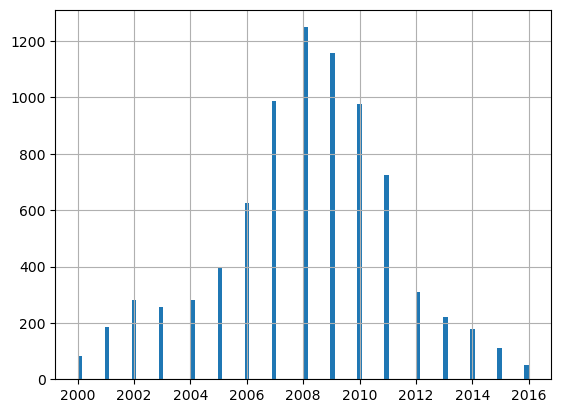

In [44]:
top5platforms.year_of_release.hist(bins = 100);

По данной гистограмме можно увидеть, что пик самых популярных по выпущенным играм на самых популярных платформах приходится с 2007 по 2011 года

### Рассмотри платформы с набибольшими суммарными продажами

Для этого сгруппируем данные по платформам и по суммарным продажам

In [45]:
data.groupby('platform').agg({'total_sales': ['mean' , 'median', 'count', 'sum']})

total_sales                      
                mean median count      sum
platform                                  
2600        0.745517  0.480   116    86.48
3DO         0.033333  0.020     3     0.10
3DS         0.503535  0.120   512   257.81
DC          0.306731  0.135    52    15.95
DS          0.378491  0.110  2121   802.78
GB          2.622990  1.180    97   254.43
GBA         0.385795  0.160   811   312.88
GC          0.362970  0.150   542   196.73
GEN         1.050000  0.150    27    28.35
GG          0.040000  0.040     1     0.04
N64         0.689905  0.270   316   218.01
NES         2.561735  1.375    98   251.05
NG          0.120000  0.100    12     1.44
PC          0.267252  0.050   957   255.76
PCFX        0.030000  0.030     1     0.03
PS          0.611412  0.260  1190   727.58
PS2         0.579953  0.230  2127  1233.56
PS3         0.713124  0.280  1306   931.34
PS4         0.801378  0.200   392   314.14
PSP         0.242691  0.090  1193   289.53
PSV         0.125431  0.050   429    53.81
SAT         0.194162  0.120   173    33.59
SCD         0.310000  0.065     6     1.86
SNES        0.836987  0.320   239   200.04
TG16        0.080000  0.080     2     0.16
WS          0.236667  0.215     6     1.42
Wii         0.692986  0.190  1286   891.18
WiiU        0.559116  0.220   147    82.19
X360        0.780227  0.280  1232   961.24
XB          0.313288  0.150   803   251.57
XOne        0.645020  0.220   247   159.32

Можнно заметить, что самые большие по суммарным продажам игр платформы это - PS2, xBox360, PS3, Wii и DS. Построим распределение продаж по годам по этим платформам

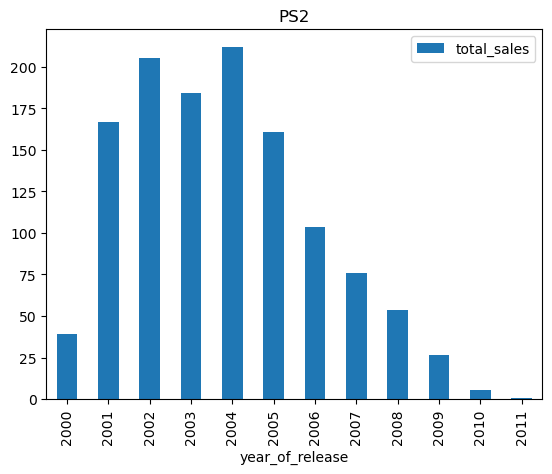

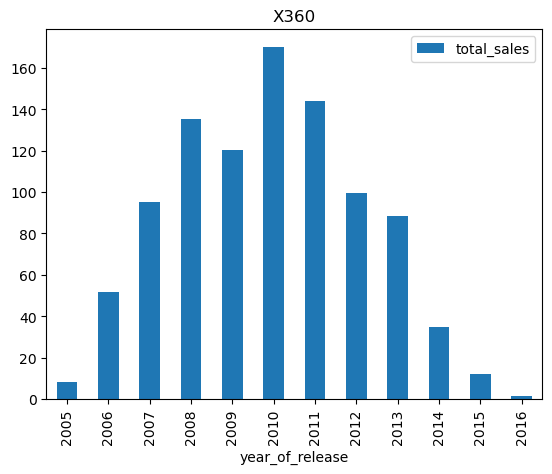

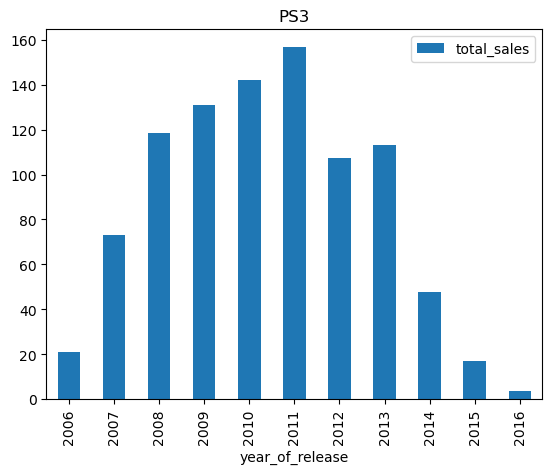

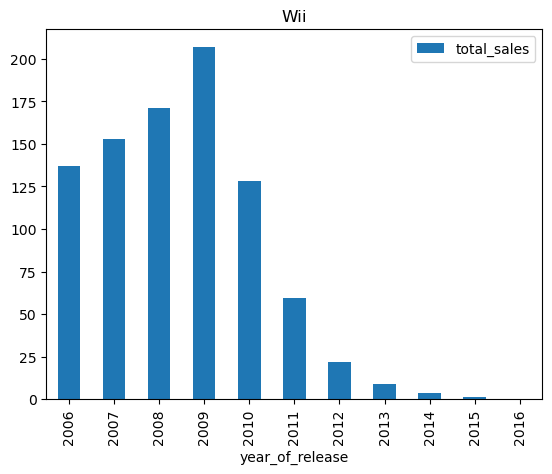

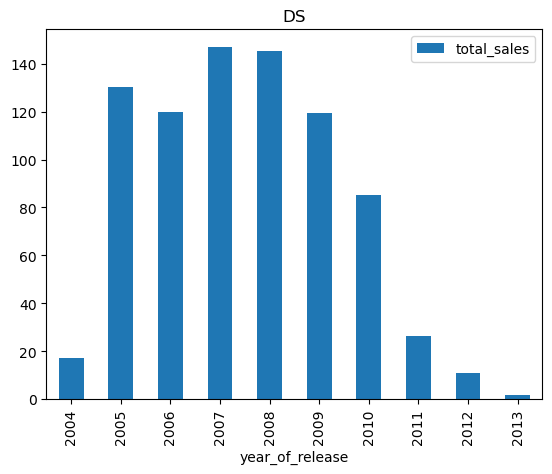

In [46]:
top_platforms = ['PS2','X360' ,'PS3', 'Wii', 'DS']
for platform in top_platforms:
    data.query('platform == @platform').groupby('year_of_release').agg({'total_sales': 'sum'}).plot(kind = 'bar', title = platform);

По данным гистограммам можно сделать вывод о том, что актуальным периодом для платформ по продажам, в среднем, является 5 лет. А "срок жизни" платформы составляет ~10 лет. Это весьма логично, так как с развитием технологий меняются и сами платформы с обновленными техническими характеристиками.

### Создадим новый датасет с актуальными для нашего исследования данными.

In [47]:
actual_data = data.query('year_of_release > 2011')

In [48]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   int32  
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(6), int32(2), object(4)
memory usage: 270.6+ KB


Рассмотрим сумму продаж по платформам за определенный актуальный период

In [49]:
actual_data.groupby('platform').agg({'total_sales': ['mean' , 'median', 'count', 'sum']})

total_sales                     
                mean median count     sum
platform                                 
3DS         0.491439   0.11   396  194.61
DS          0.404839   0.05    31   12.55
PC          0.250600   0.08   250   62.65
PS3         0.585781   0.20   493  288.79
PS4         0.801378   0.20   392  314.14
PSP         0.064682   0.03   173   11.19
PSV         0.119659   0.05   411   49.18
Wii         0.655000   0.18    54   35.37
WiiU        0.559116   0.22   147   82.19
X360        0.810068   0.31   292  236.54
XOne        0.645020   0.22   247  159.32

Рассмотрим тенденцию протаж по актуальным плтаформам

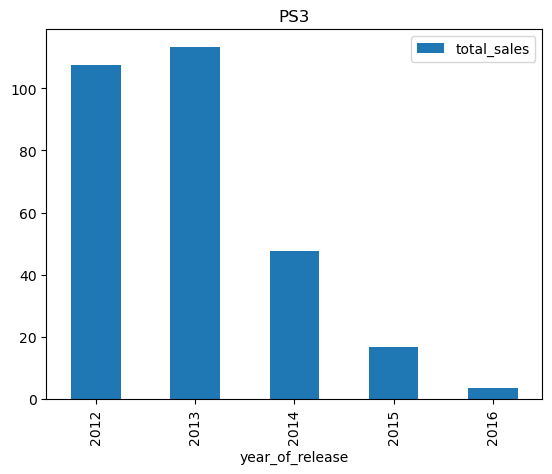

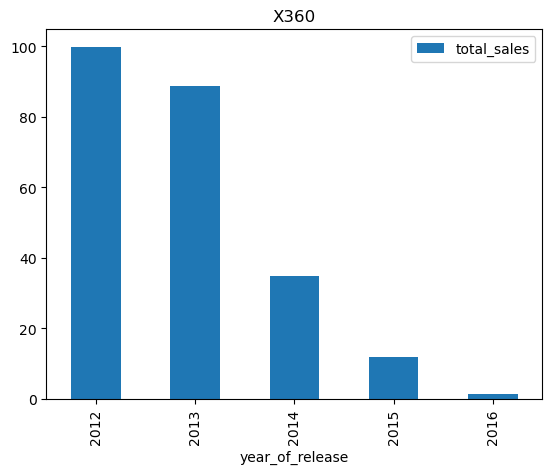

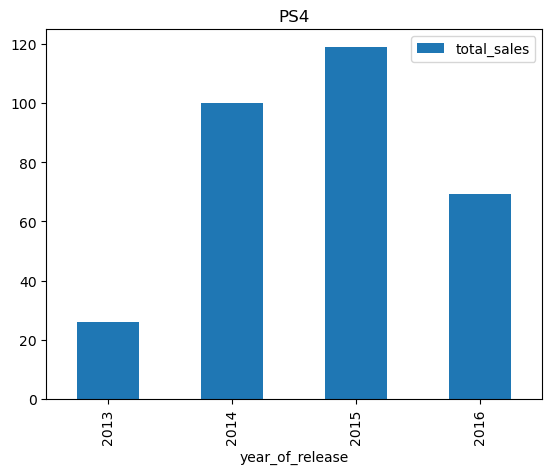

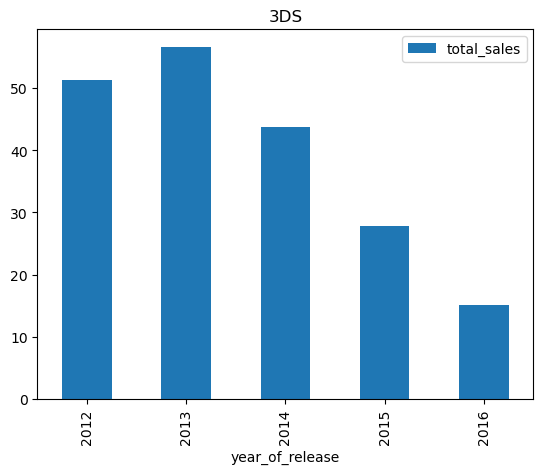

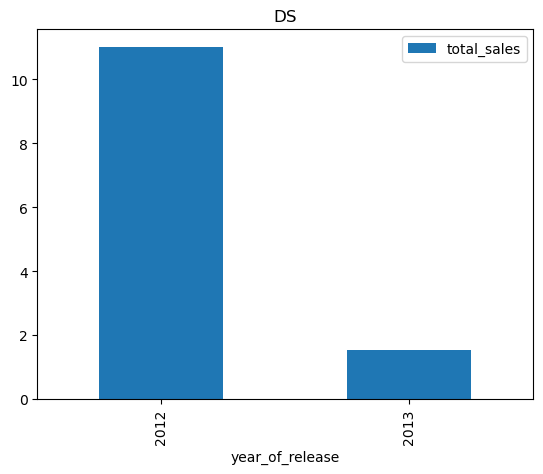

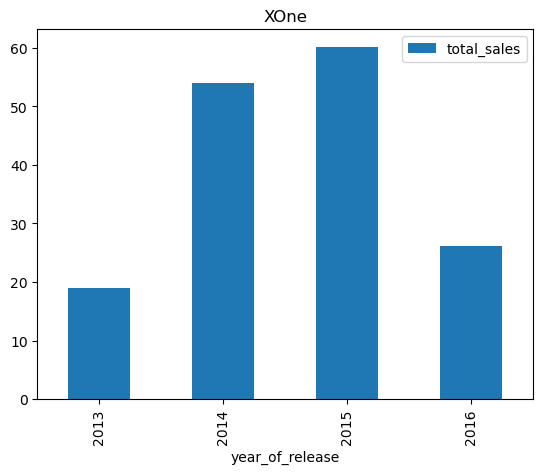

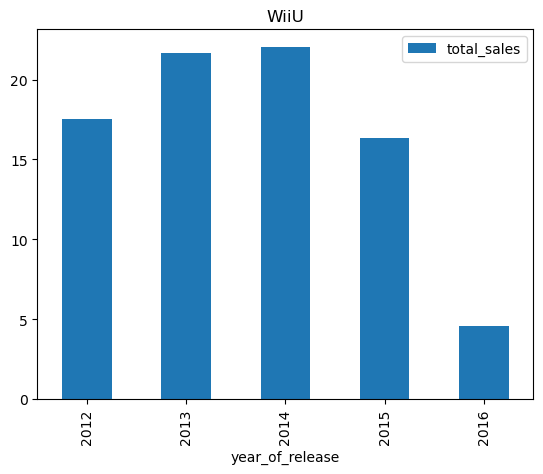

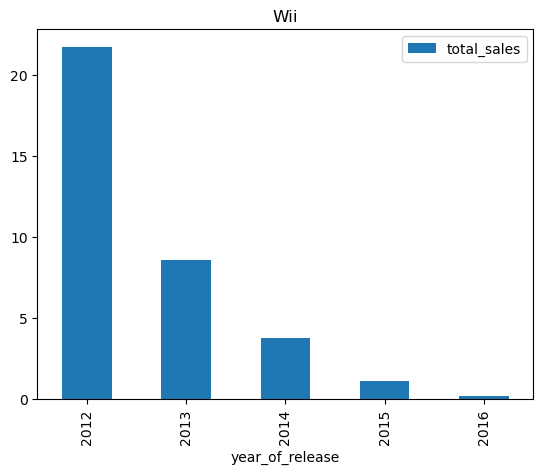

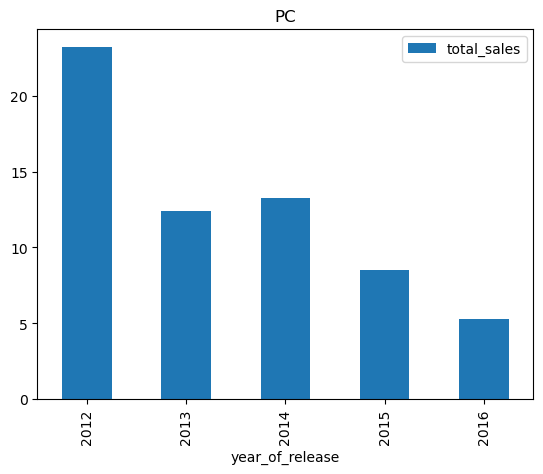

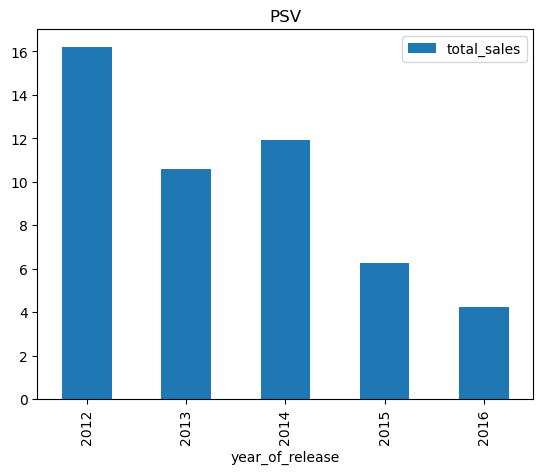

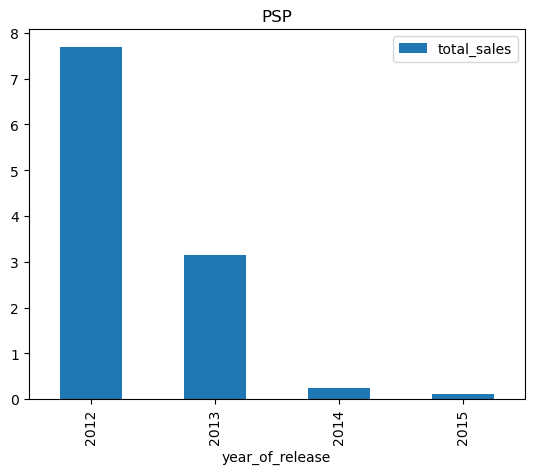

In [50]:
actual_platforms = ['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC','PSV', 'PSP']
for platform in actual_platforms:
    actual_data.query('platform == @platform').groupby('year_of_release').agg({'total_sales': 'sum'}).plot(kind = 'bar', title = platform);

Тенденции по каждой платформе видны. Но нам для полного понимания тенденций необходимо рассмотреть все платформы. создадим линейную диаграмму по актуальным платформам

In [51]:
actual_platform_stat = actual_data.groupby(['platform','year_of_release']).agg({'total_sales': ['sum']})

In [52]:
actual_platform_stat.columns = ['total_sales_sum']

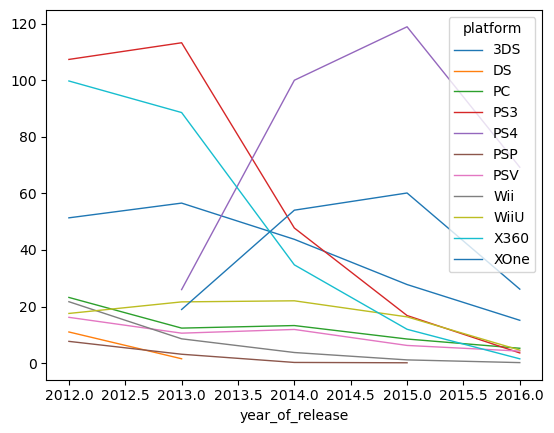

In [53]:
table = pd.pivot_table(actual_platform_stat, values= 'total_sales_sum', index='year_of_release', columns='platform')
chart = table.plot(kind='line', linewidth=1.0)

По этому графику можно увидеть следующие тенденции:
<oi>
    <li> Наиболее актуальной платформой за взятый промежуток времни является ps4 </li>
    <li> Второй по популярности является xBox One </li>
    <li> Третьей является Nintendo 3DS</li>
    <li> Соответственно, при выборе платформы, на которые стоит выпускать игры стоит обратить внимание на вышеперечисленные три платформы</li>
    <li> Nintendo DS потеряло свою актуальность в 2013 </li>
    <li> PSP также потеряло свою актуальность но в 2015 году </li>
    <li> Можно заметить тенденцию: Общие продажи по остальным платформам за последнее время падают. Исключением из этой тенденции я бы взял игры на PC. Так как технические характеристики PC с течением времени меняются в отличии от консолей и приставок с уже встроенным "железом"</li>

### Построение ящика с усами по глобальным продажам по платфомам

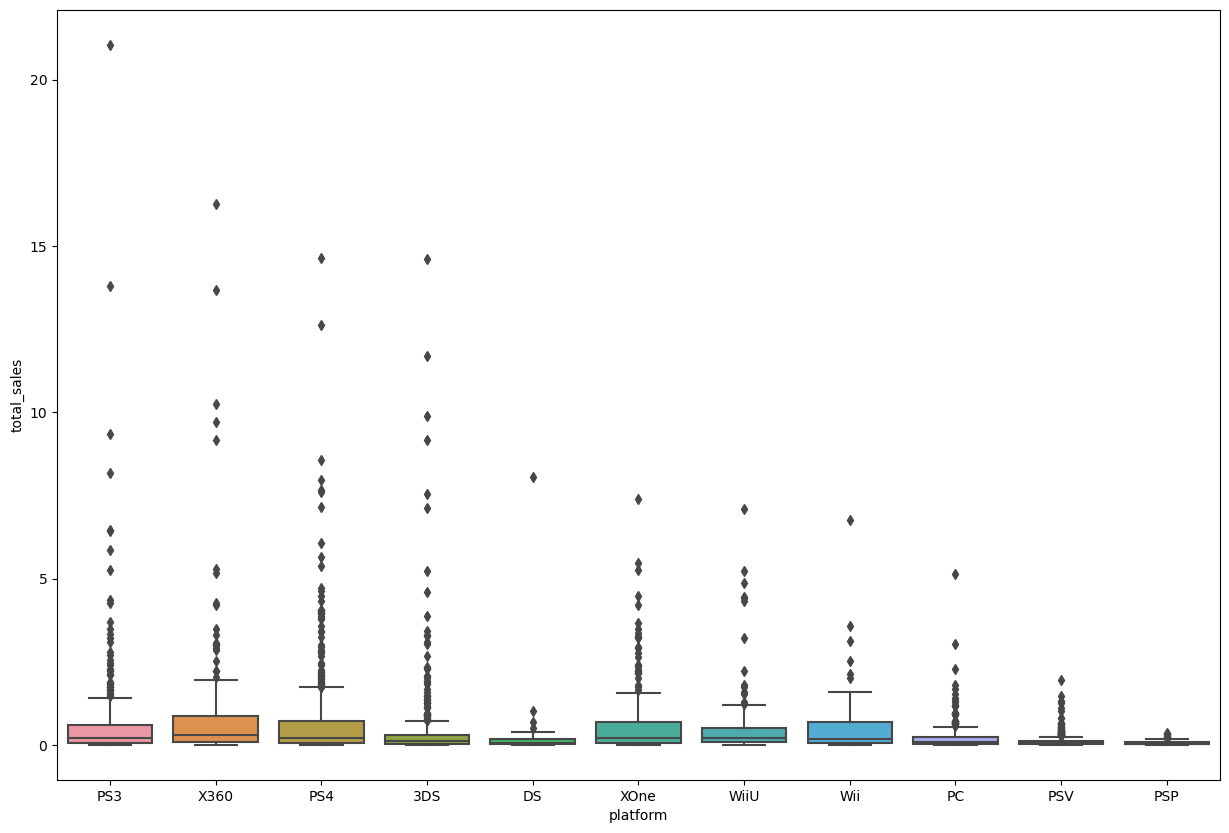

In [54]:
plt.figure(figsize = (15,10))
seaborn.boxplot(data = actual_data, x = "platform", y= 'total_sales');

По полученному графику можно сделат несколько выводов:
<oi>
    <li> У PS3, XBox 360, PS4, nintendo 3DS есть проекты, которые очень сильно отличаются по показателям продаж относительно осносной части продаж игр на эти консоли  </li>
    <li> У Nintendo DS, Xbox one, WiiU, Wii и PC такая игра только одна за выбранный ранее период. Такие игры скорее всегоявляются AAA (triple-A) проектами, являющимися блокбастерами в мире видеоигр  </li>
    <li> У PSVita И PSP таких проектов за выбранный период времени, судя по графику нет </li>
Для того, чтобы чуть подробнее рассмотреть ящики с усами по платформам дифференцируем основную часть выбросов от всех консолей и основную часть игр.

In [55]:
actual_data.query('total_sales >= 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,undefined,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90


Для людей знакомымых с игровой индустрией полученный список не будет сюрпризом. Каждая игра из полученного списка - достаточно известный тайтл, в которые играли и которые, как минимум, на слуху

Теперь отсепарируем данные по актуальным по времени играм и построим новый график без выбросов

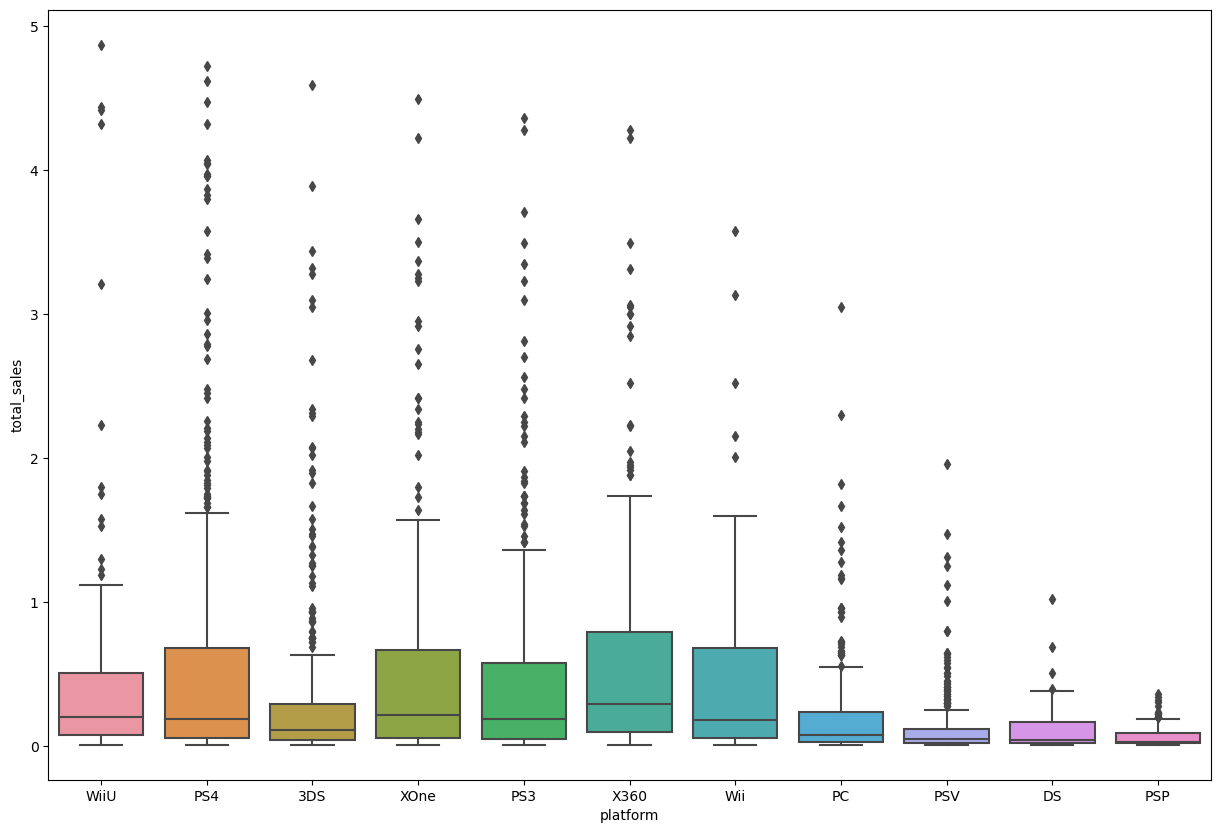

In [56]:
plt.figure(figsize = (15,10))
seaborn.boxplot(data = actual_data.query('total_sales < 5'), x = "platform", y= 'total_sales');

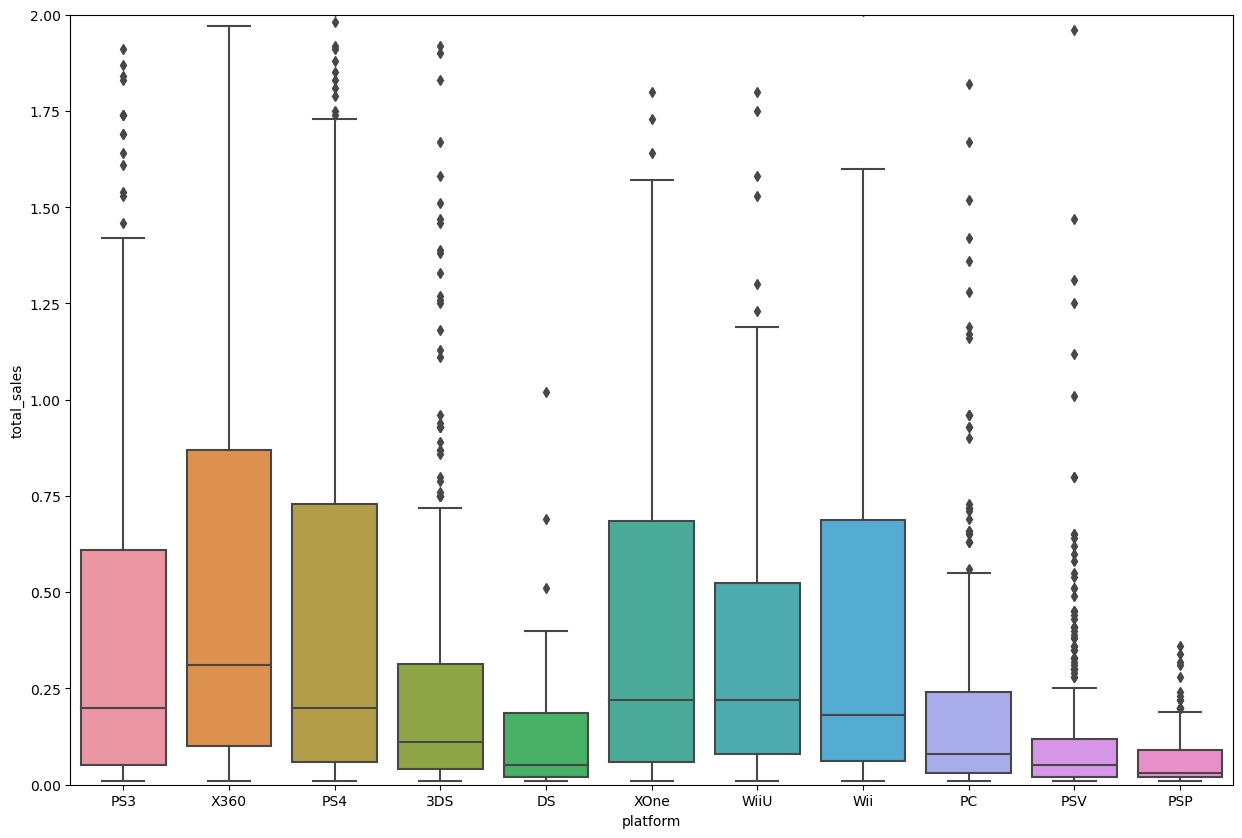

In [57]:
plt.figure(figsize = (15,10))
plt.ylim([0,2])
seaborn.boxplot(data = actual_data, x = "platform", y= 'total_sales');

Данный график куда нагляднее демонстрирует ситуацию с продажами игр на различных платформах. Можно пронаблюдать следующие тенденции: 
<oi>
<li> Надежнее всего с точки зрения прибыльности продаваемых игр являются такие платформы как: x360, wii, ps4, XOne, PS3 и WiiU.
<li> Ps4, 3DS, Ps3 и XOne обладают среьзным количеством игр, которые выбиваются из нормального распределения продаж и продаются куда дороже средних показателей по продажам на описанных платформах

### Рассмотрим созависимость оценок критиков и пользователей на примере ps4

Платформа Ps4 выбрана не случайно. По моему мнению, это одни из самых успешных консолей для создания и продаж игр на ней, в чем мы частично убедились в процессе исследования

Создадим отдельный датафрейм с данными по играм, выходящими на данной консоли.

In [58]:
ps4_games = actual_data.query('platform == "PS4"')

Стоит напомнить, что на этапе предобработки я в столбцах critic_score и user_score поставил "заглушки" в виде значений "-1" и "-2" вместо пустых значений и значений "tbd". Эти заглушки будут мешать нам в расчете корреляции между отзывами и продажами. Здесь можно поступить двумя путями: Либо убрать отрицательные значения в обоих столбцах с оценками и рассчитывать корреляцию, либо создать 2 датафрейма для рассчета корреляций между продажами и оценками, и в одном из них убрать отрицательные значения по оценкам критиков, а в другом оценки пользователей. Мне кажется второй вариант здесь будет более репрезентативным.

In [59]:
ps4_games_for_critics = ps4_games.query('critic_score >= 0')

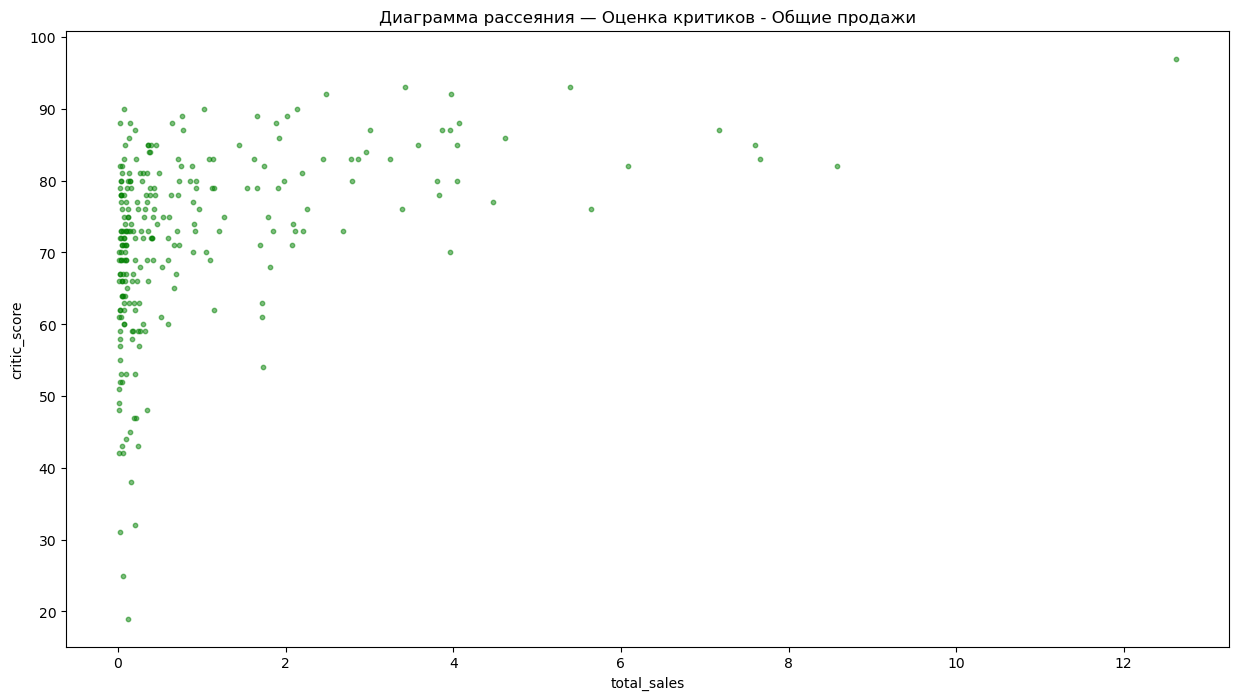

In [60]:
ps4_games_for_critics.plot(kind='scatter',
        y='critic_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 10)
plt.title('Диаграмма рассеяния — Оценка критиков - Общие продажи');

Рассчитаем корреляцию между оценкой критиков и продажами

In [61]:
ps4_games_for_critics.critic_score.corr(ps4_games_for_critics.total_sales)

0.40656790206178123

**График и рассчет корреляции показывает, что связь есть, но не слишком сильная**

In [62]:
ps4_games_for_users = ps4_games.query('user_score >= 0')

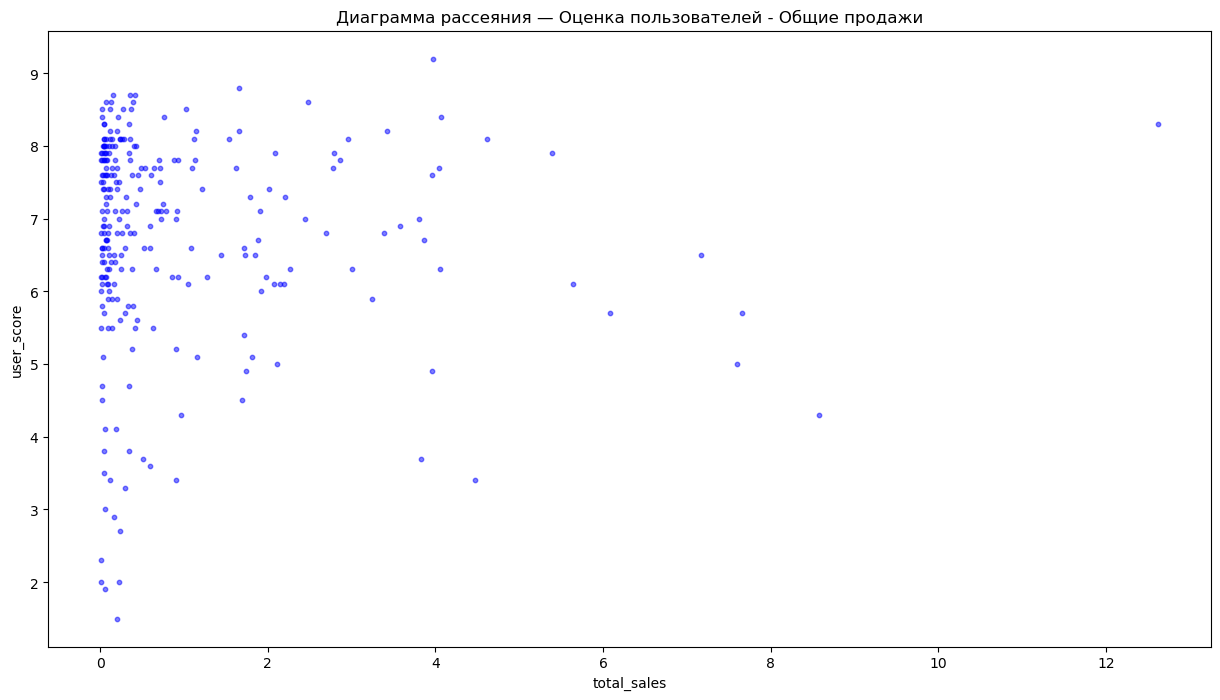

In [63]:
ps4_games_for_users.plot(kind='scatter',
        y='user_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 10)
plt.title('Диаграмма рассеяния — Оценка пользователей - Общие продажи');

In [64]:
ps4_games_for_users.user_score.corr(ps4_games_for_users.total_sales)

-0.03195711020455644

**А здесь корреляции нет вовсе. В принципе это можно объяснить тем, что пользователи, основываясь на мнении критиков покупают ту или иную игру, но игра пользователю не обязательно должна понравится. Пользователь купил игру и значение продаж поднялось, но оценку пользователь мог поставить плохую.**

### Сравним показатели по платформе ps4 с пятью популярными платформами

Для сравнения возьмем другие популярные платформы такие как: x360, wii, XOne, PS3 и WiiU.

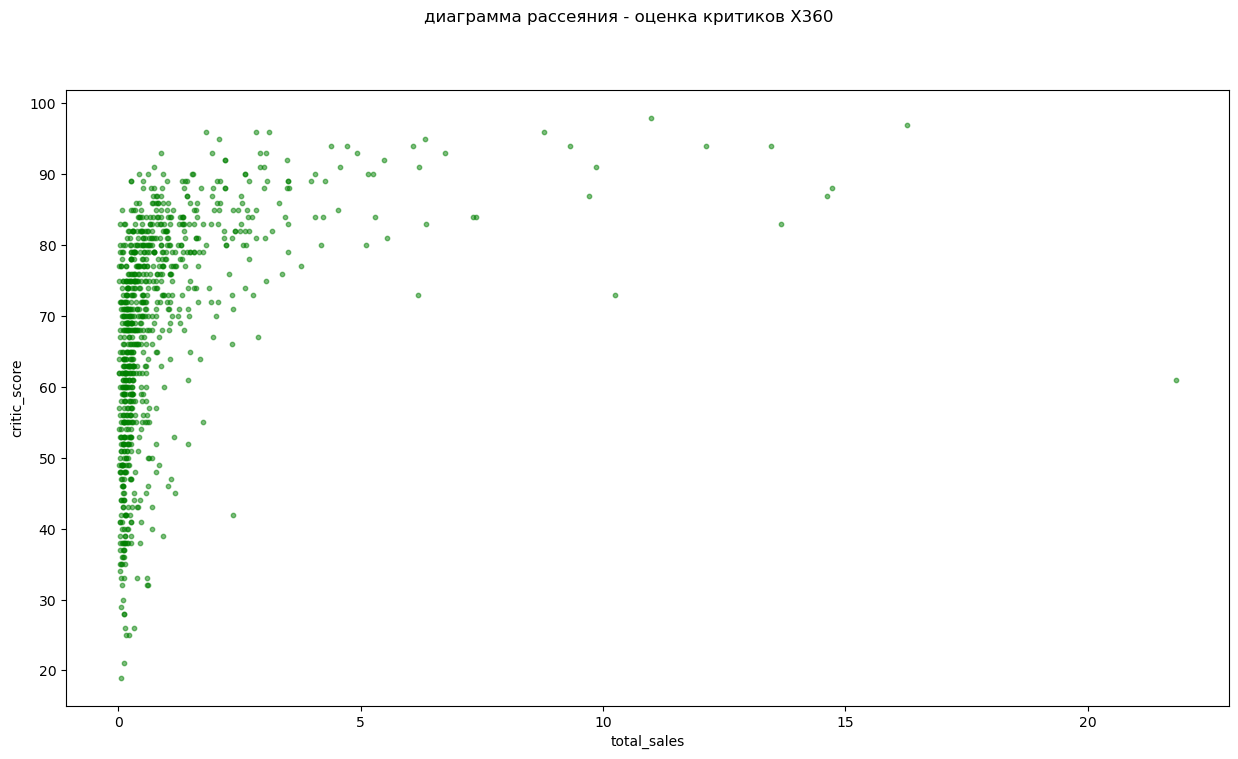

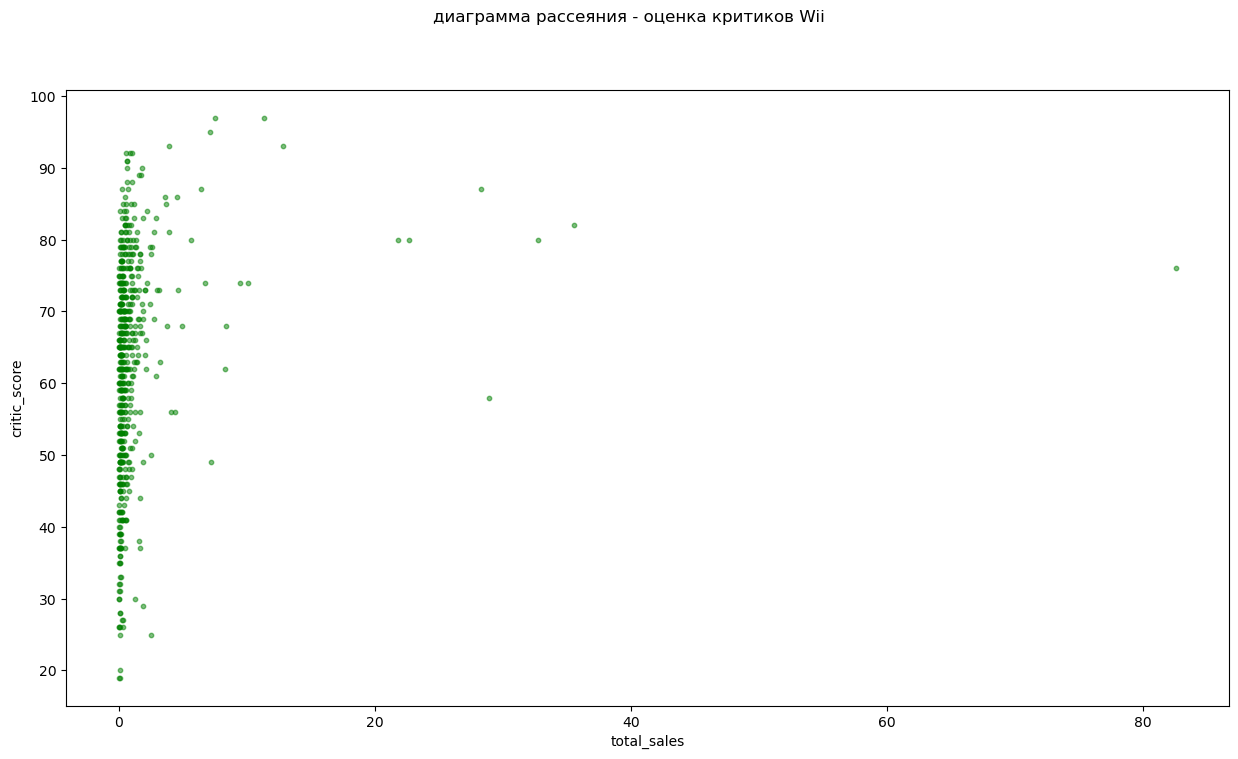

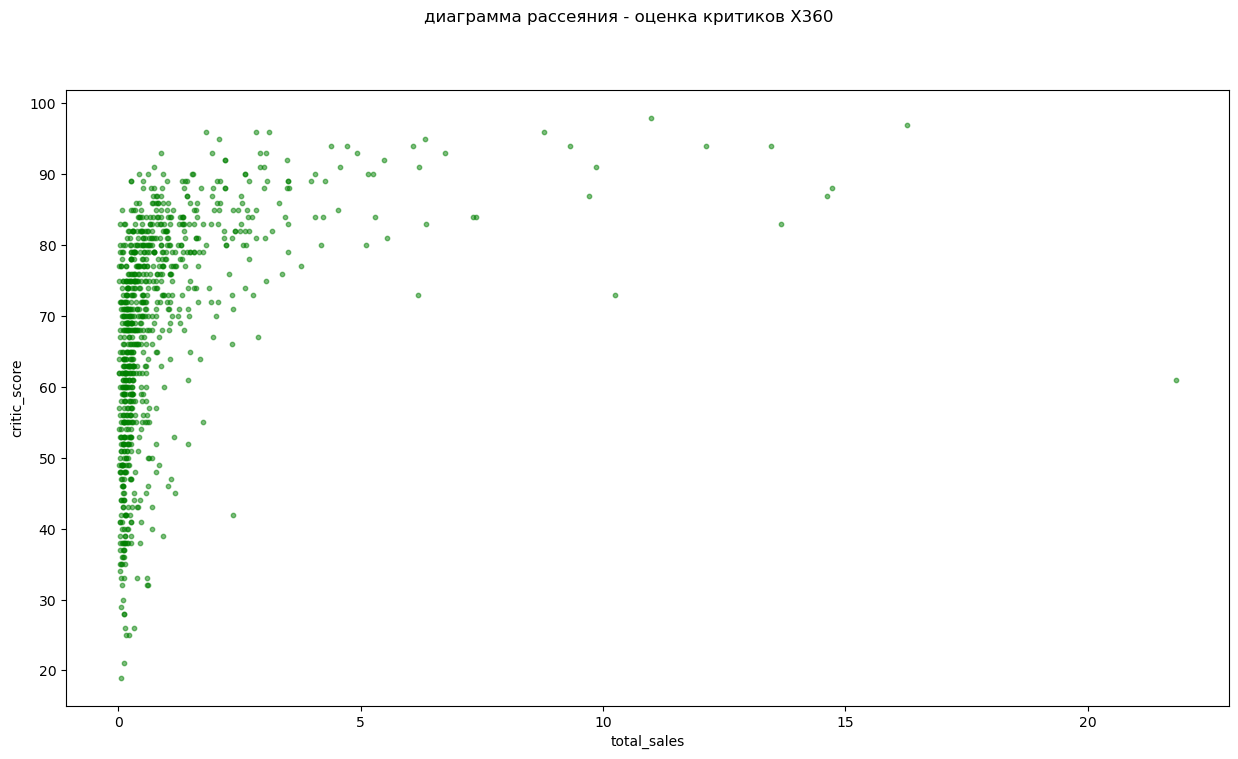

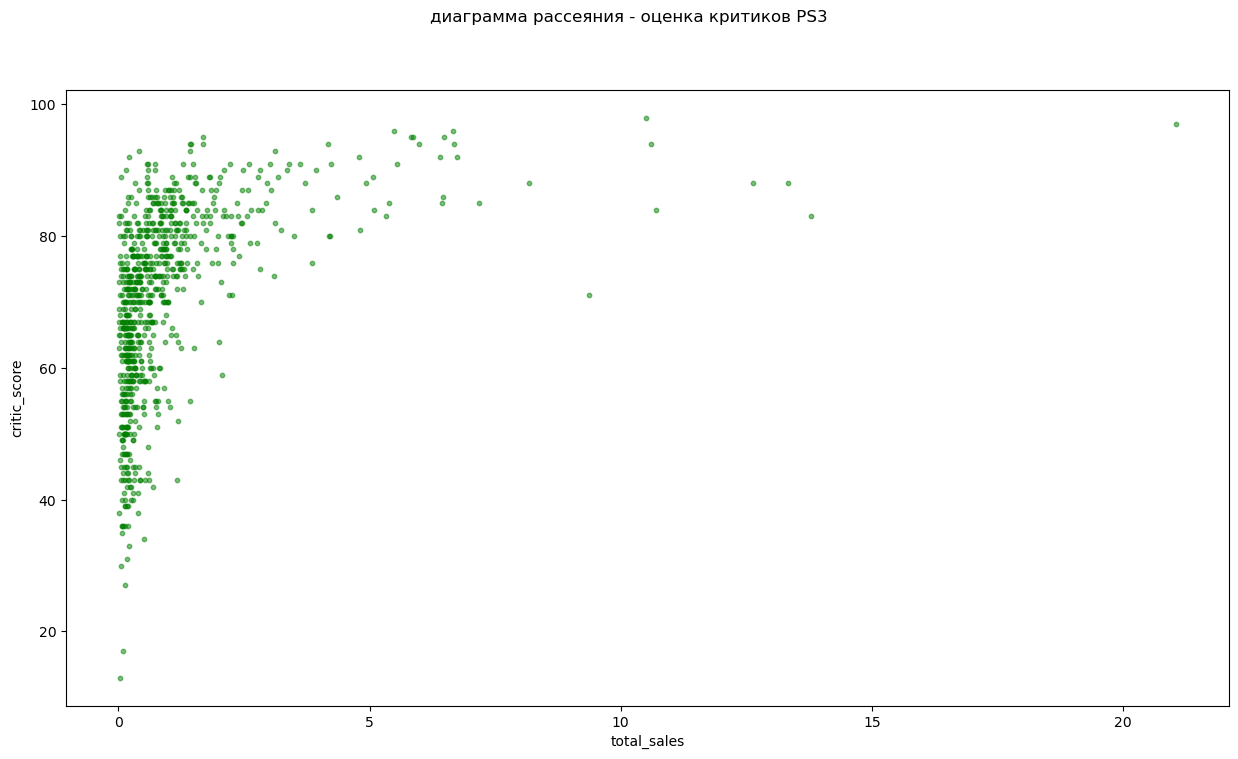

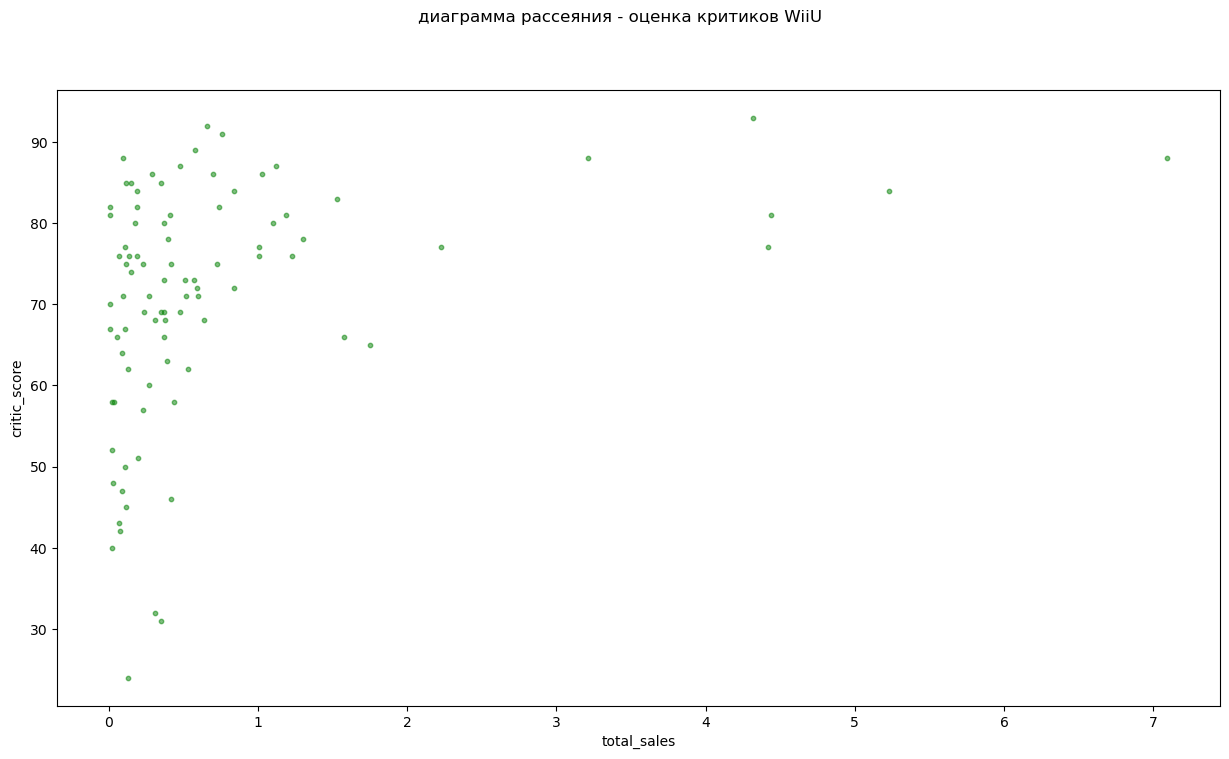

In [65]:
top_platforms = ['X360', 'Wii', 'X360', 'PS3', 'WiiU']
for platform in top_platforms:
        data.query('platform == @platform and critic_score >= 0').groupby('platform').plot(kind='scatter',
        y='critic_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 10 , title ='диаграмма рассеяния - оценка критиков ' + platform)

In [66]:
# Комментарий ревьюера 2
data.year_of_release.min()

1980

In [67]:
top_platforms = ['X360', 'Wii', 'X360', 'PS3', 'WiiU']
for platform in top_platforms:
    print (platform , data.query('platform == @platform and critic_score >= 0').critic_score.corr(data.total_sales))

X360 0.39286589254007026
Wii 0.17790728577594936
X360 0.39286589254007026
PS3 0.43275895789971397
WiiU 0.34837976012017496


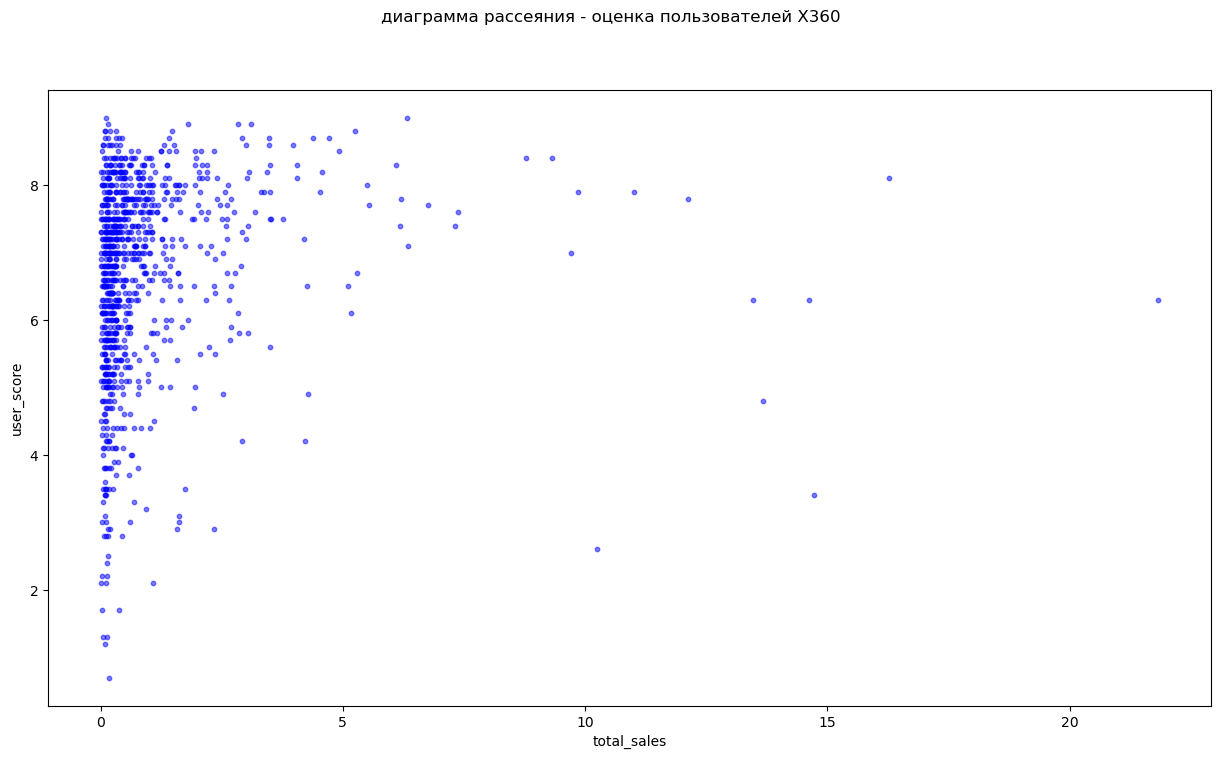

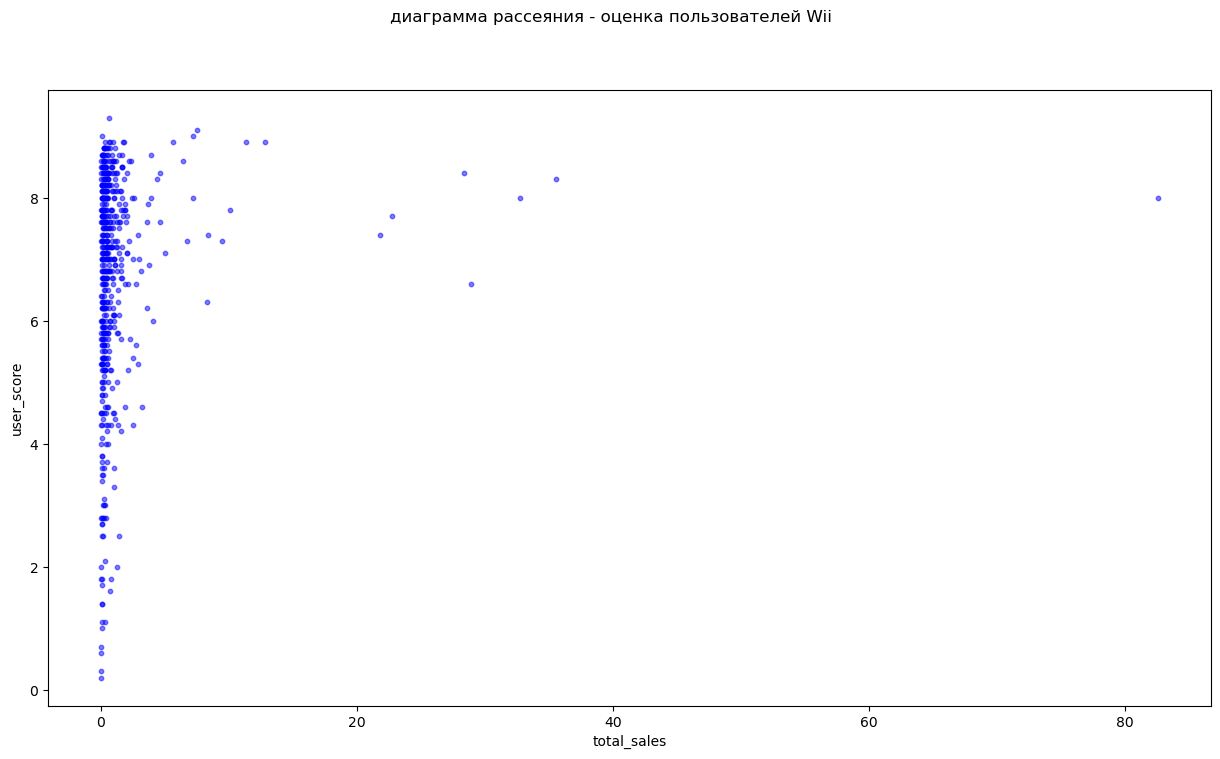

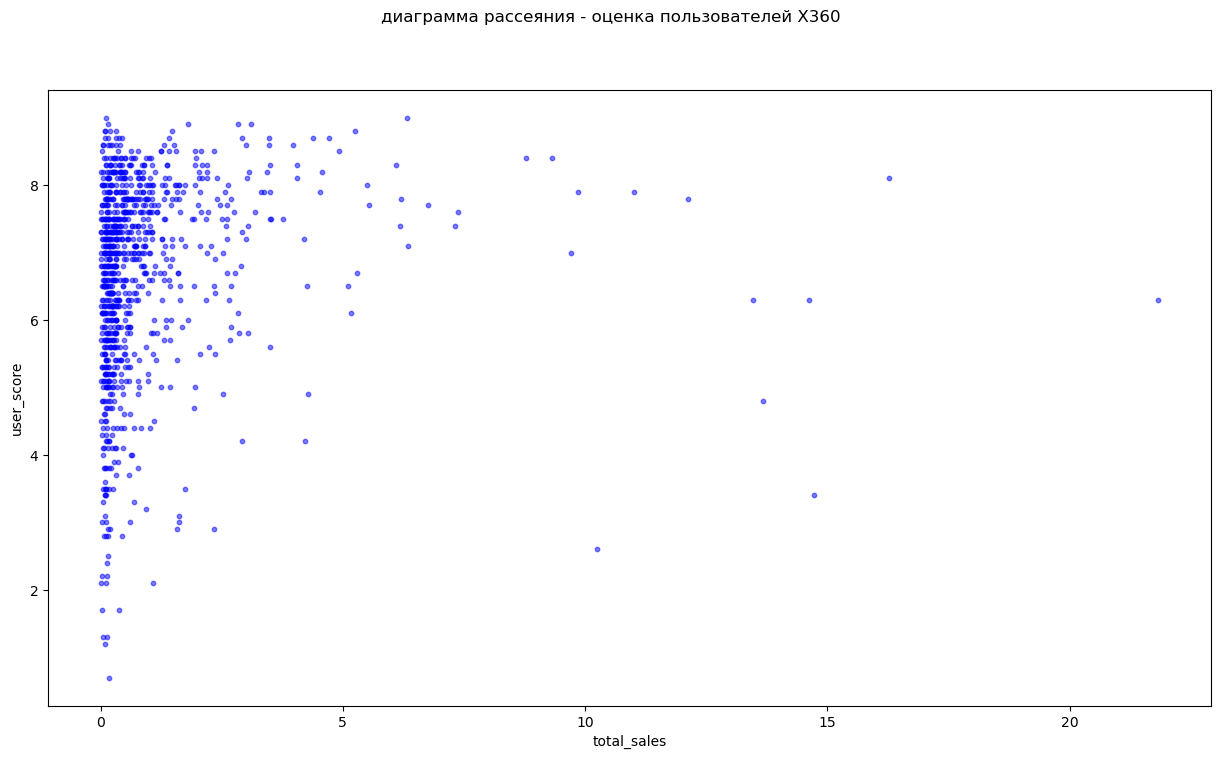

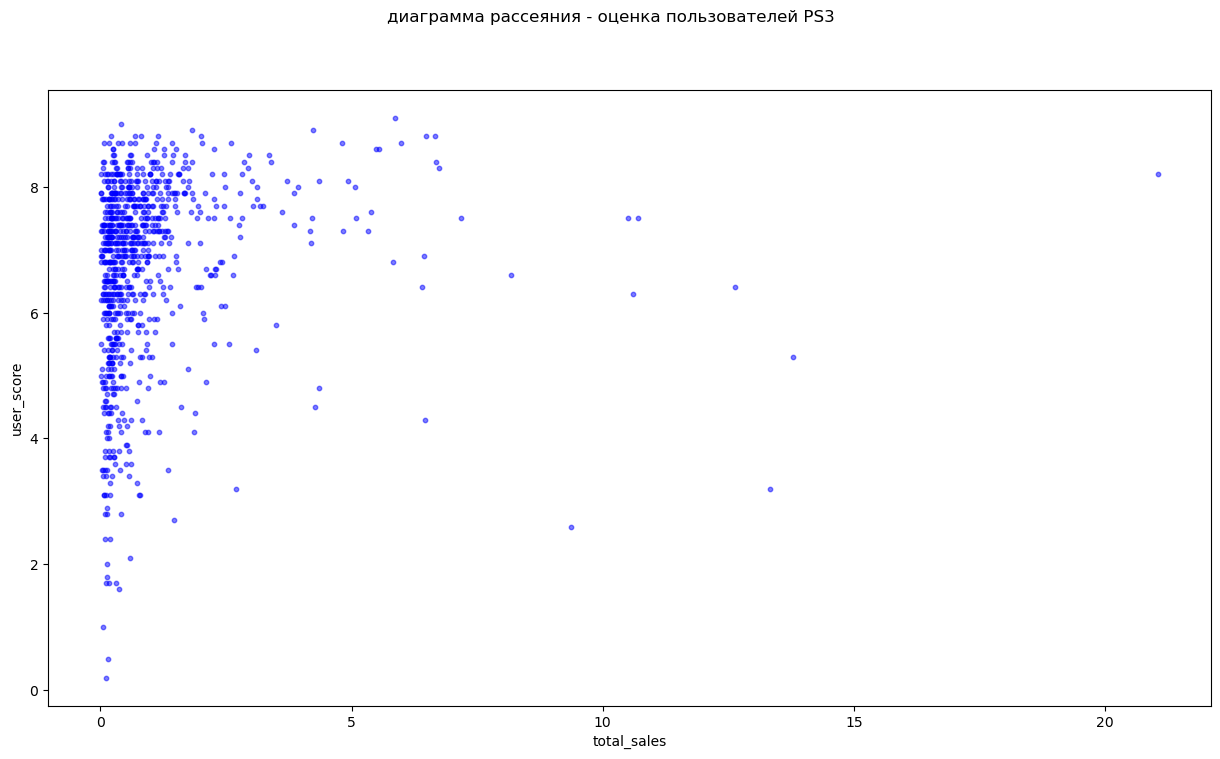

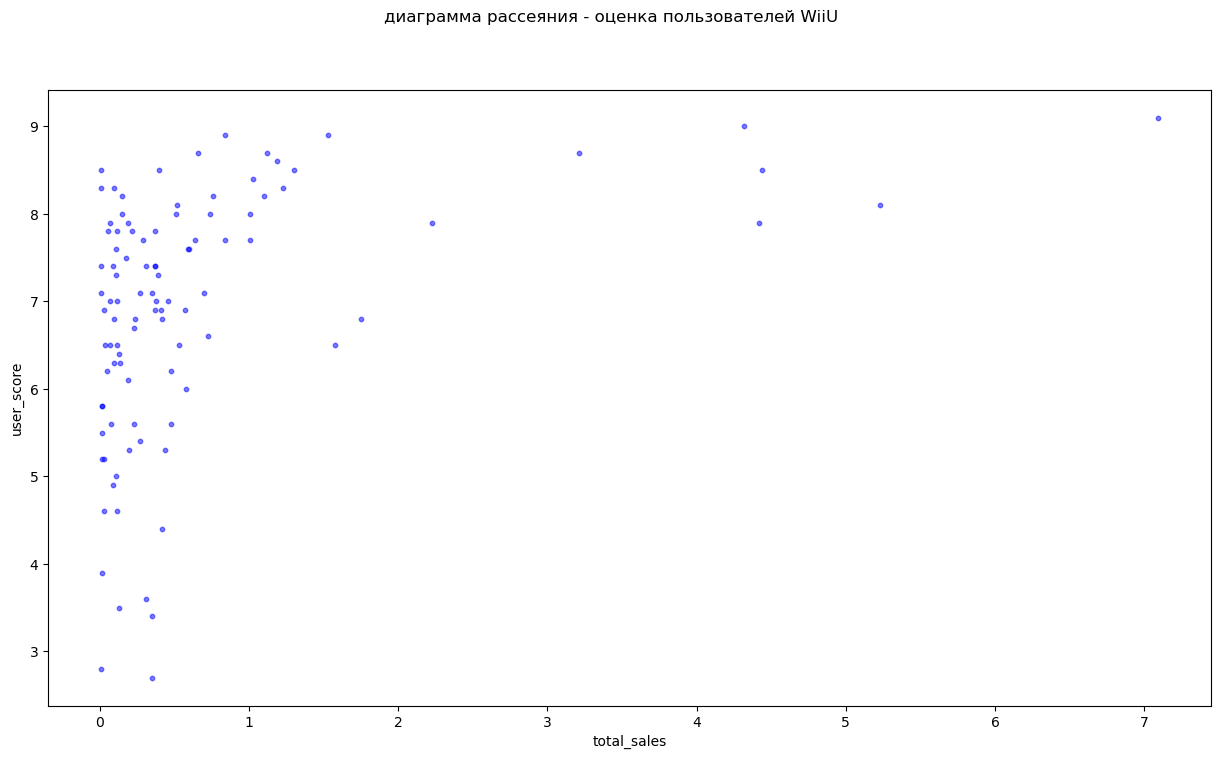

In [68]:
top_platforms = ['X360', 'Wii', 'X360', 'PS3', 'WiiU']
for platform in top_platforms:
    data.query('platform == @platform and user_score >= 0').groupby('platform').plot(kind='scatter',
        y='user_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 10 , title ='диаграмма рассеяния - оценка пользователей ' + platform)

In [69]:
top_platforms = ['X360', 'Wii', 'X360', 'PS3', 'WiiU']
for platform in top_platforms:
    print (platform , data.query('platform == @platform and user_score >= 0').user_score.corr(data.total_sales))

X360 0.11418661214018032
Wii 0.1128312136077378
X360 0.11418661214018032
PS3 0.12841562938563023
WiiU 0.40021902021486194


**Насколько мы можем заметить, по другим не менее популярным платформам ситуация отличается от тех, что мы брали по Ps4**
<li> Корреляция между отзывами критиков и продажами по 5 взятым популярным платформам и ps4 примерно одинковая, выделяется только Wii с самой слабой корреляцией.
<li> Отличаются же данные по корреляции между отзывами пользователей и продажами. Если у ps4 ее вообще не было, то у 5 взятых платформ она есть, но очень слабая. Здесь в положительную сторону выделяется платформа WiiU

In [70]:
actual_data.platform.value_counts()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64

В случае выбора актуальных платформ мы не можем брать такую платфорому как Wii так как на эту платформу вышло слишком мало игр за данный период. Расчет корреляции не будет реперезентативным. Заменим Wii на PC

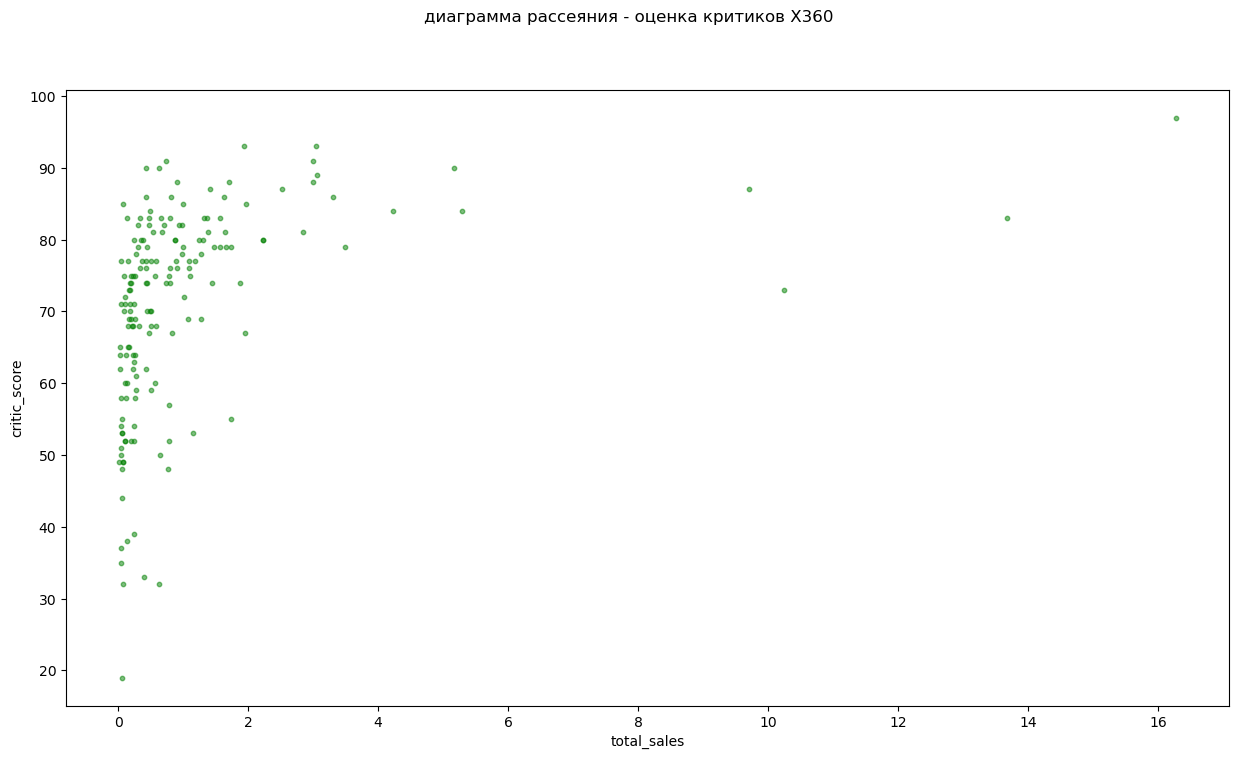

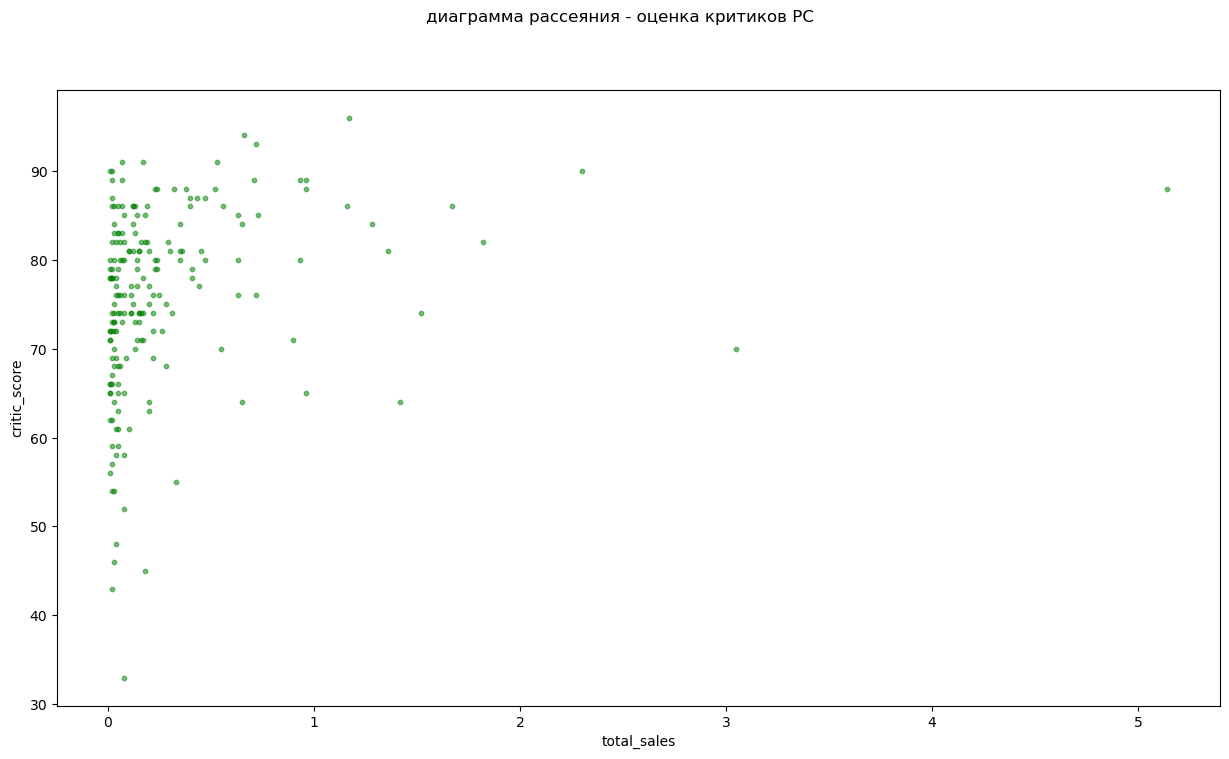

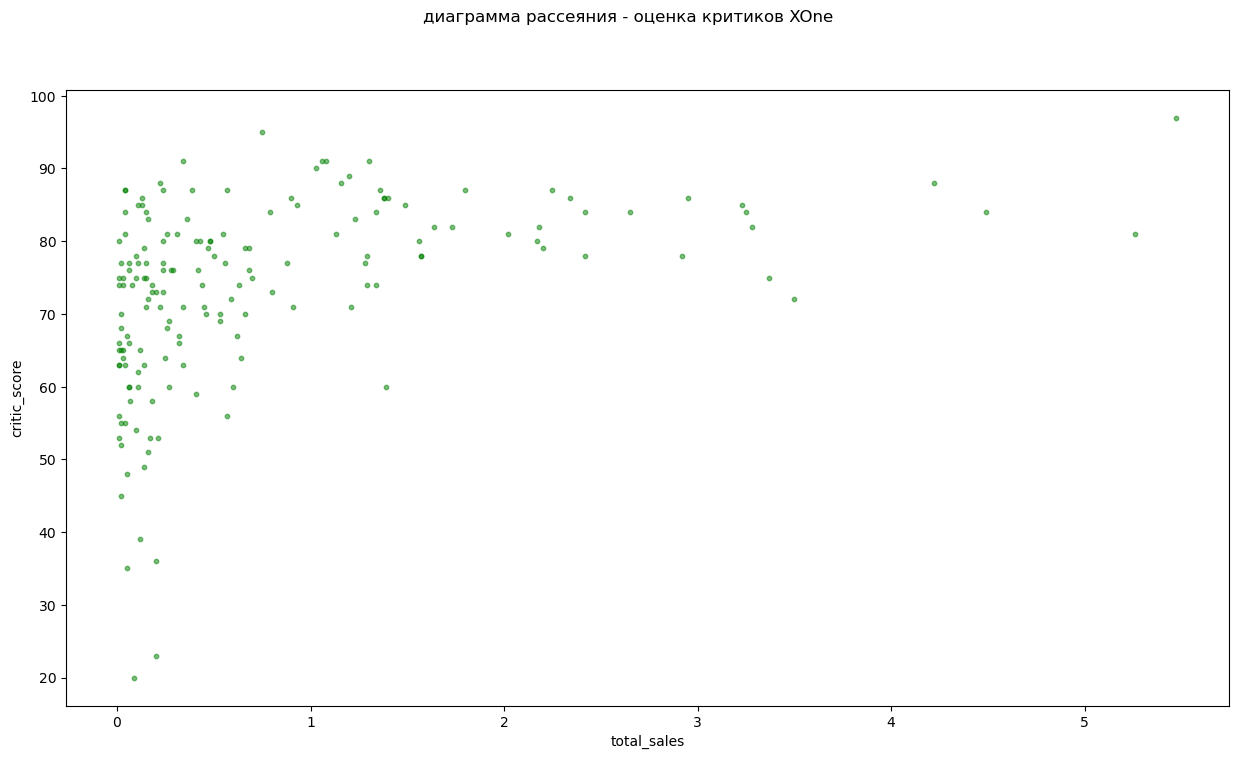

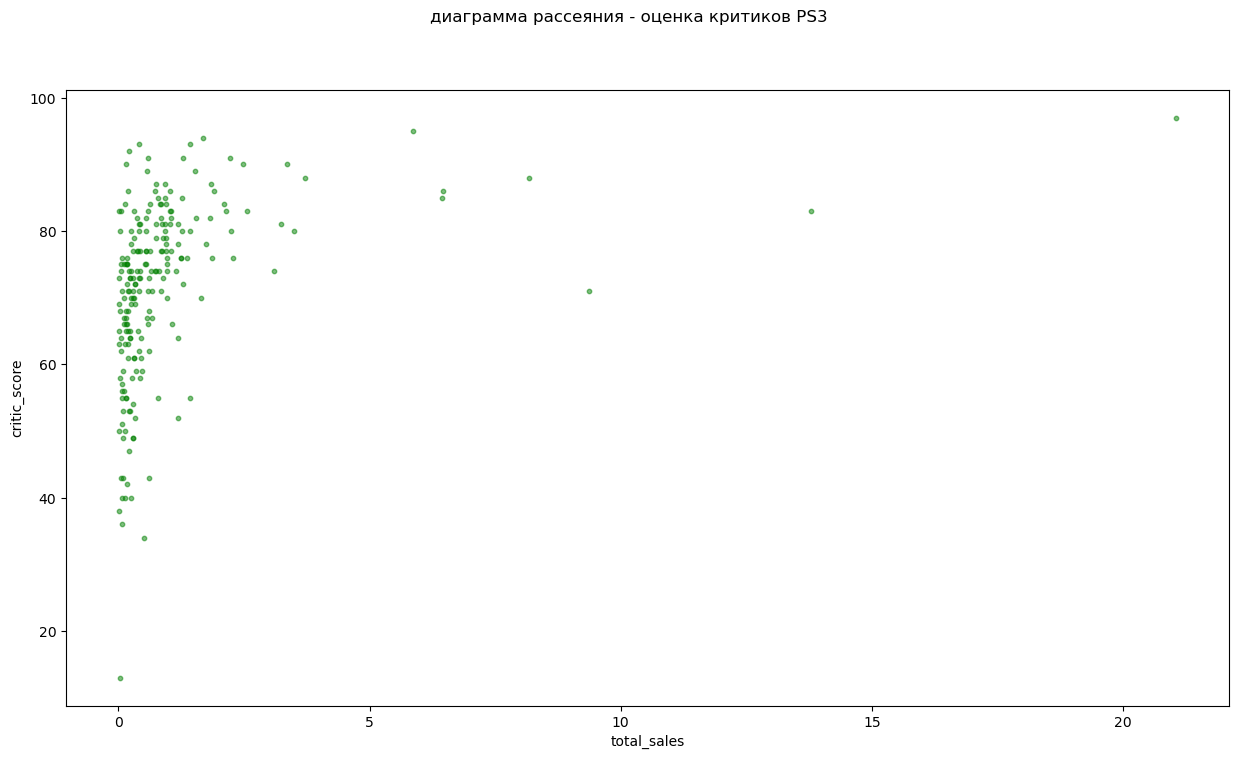

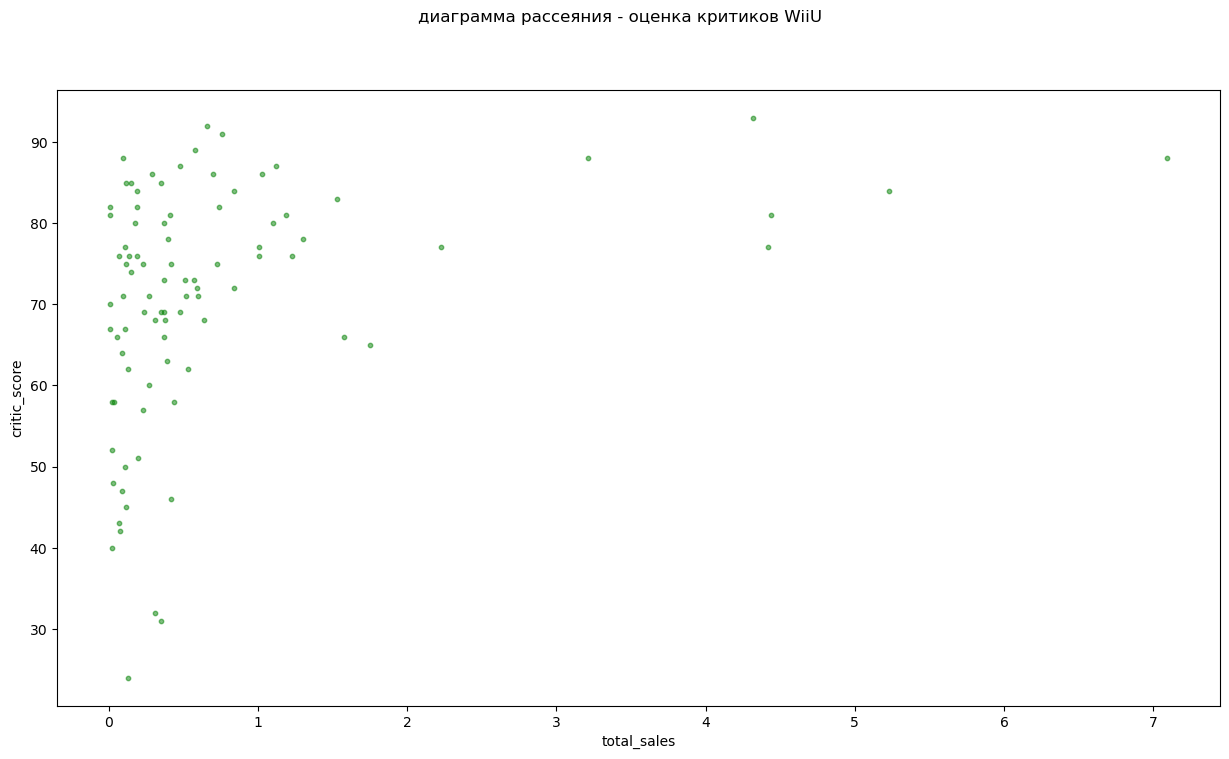

In [71]:
top_platforms = ['X360', 'PC', 'XOne', 'PS3', 'WiiU']
for platform in top_platforms:
        actual_data.query('platform == @platform and critic_score >= 0').groupby('platform').plot(kind='scatter',
        y='critic_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 10 , title ='диаграмма рассеяния - оценка критиков ' + platform)

In [72]:
actual_data.year_of_release.min()

2012

In [73]:
top_platforms = ['X360', 'PC', 'XOne', 'PS3', 'WiiU']
for platform in top_platforms:
    print (platform , actual_data.query('platform == @platform and critic_score >= 0').critic_score.corr(data.total_sales))

X360 0.36057348885073387
PC 0.23724324311567904
XOne 0.41699832800840153
PS3 0.33149725926295903
WiiU 0.34837976012017496


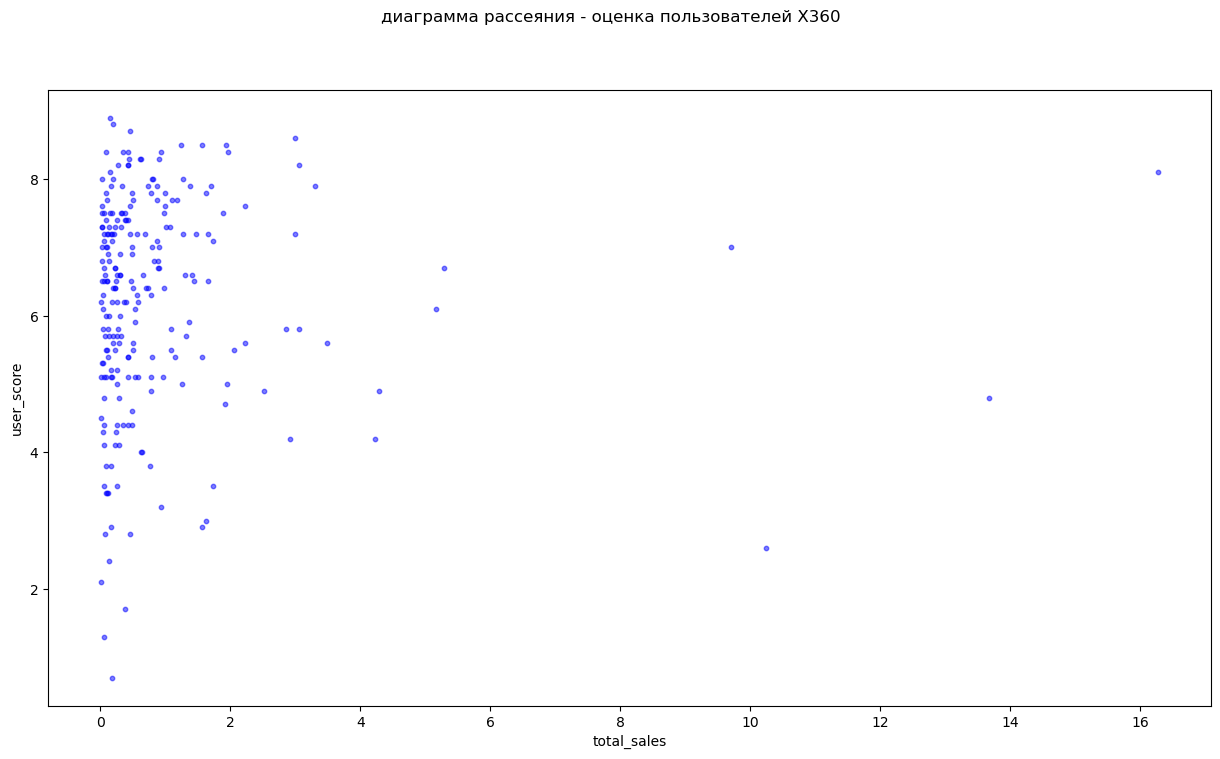

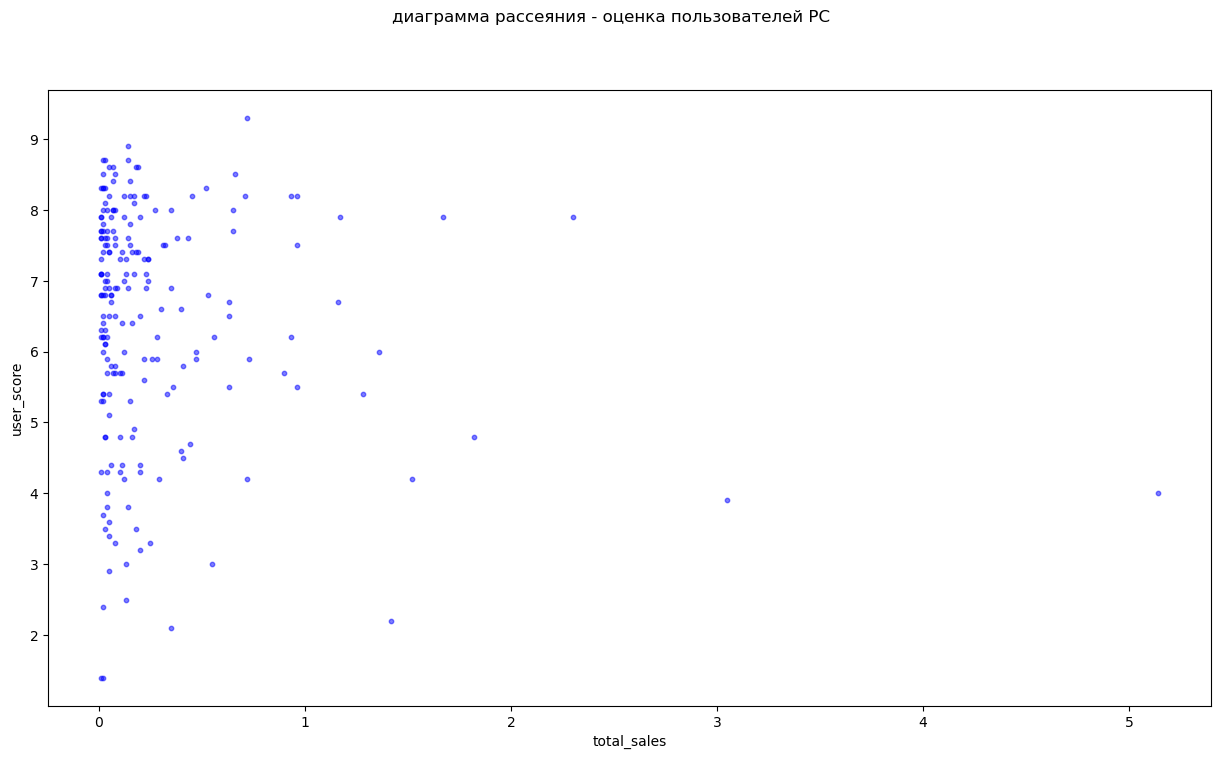

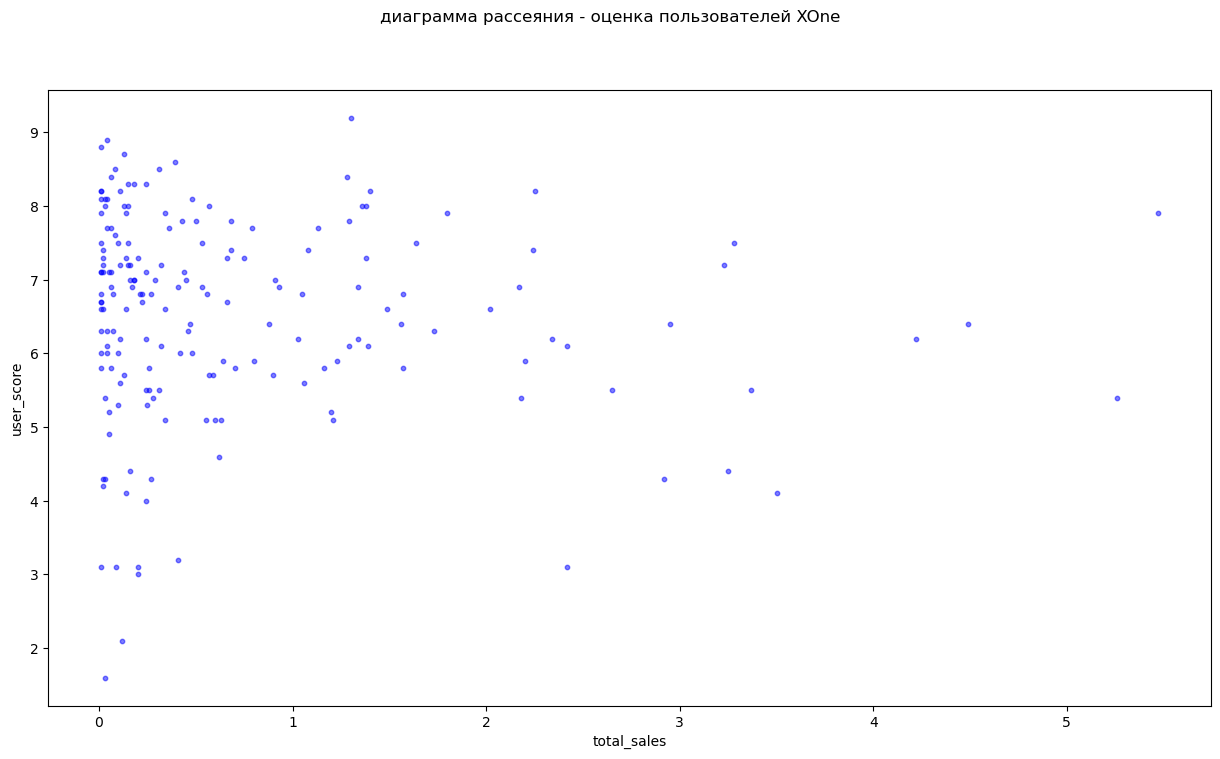

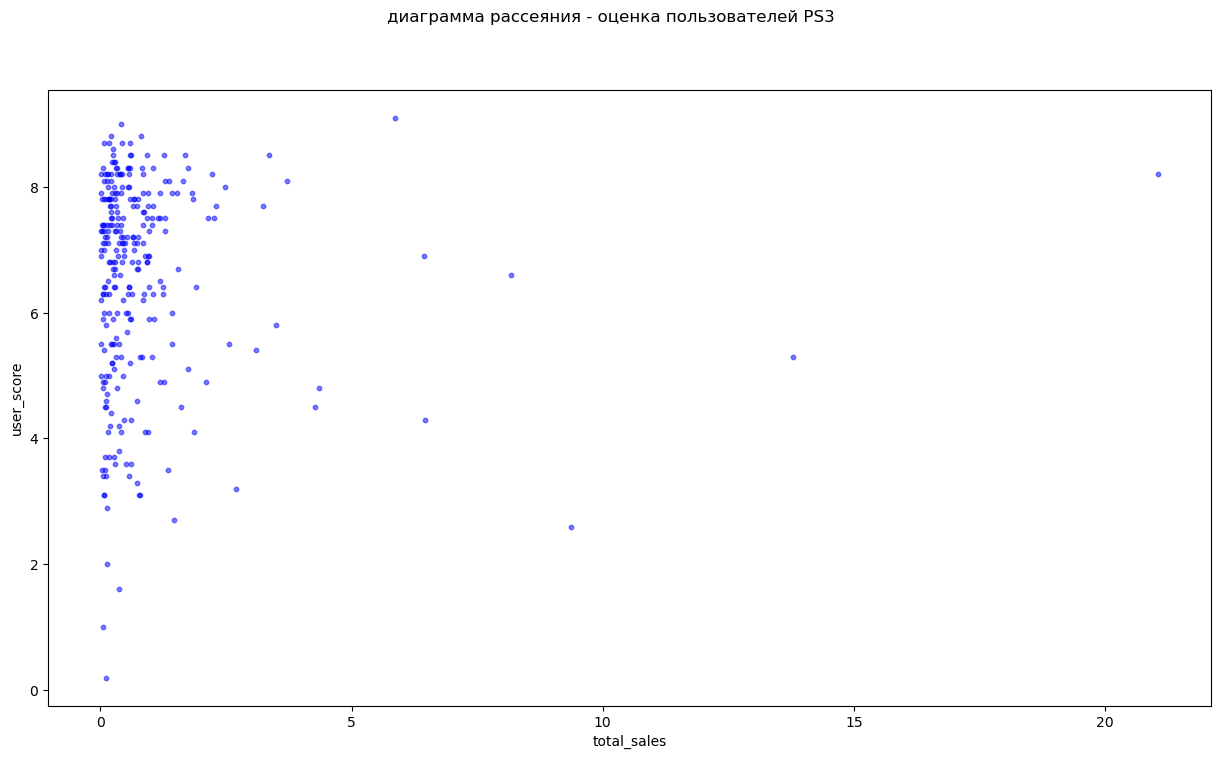

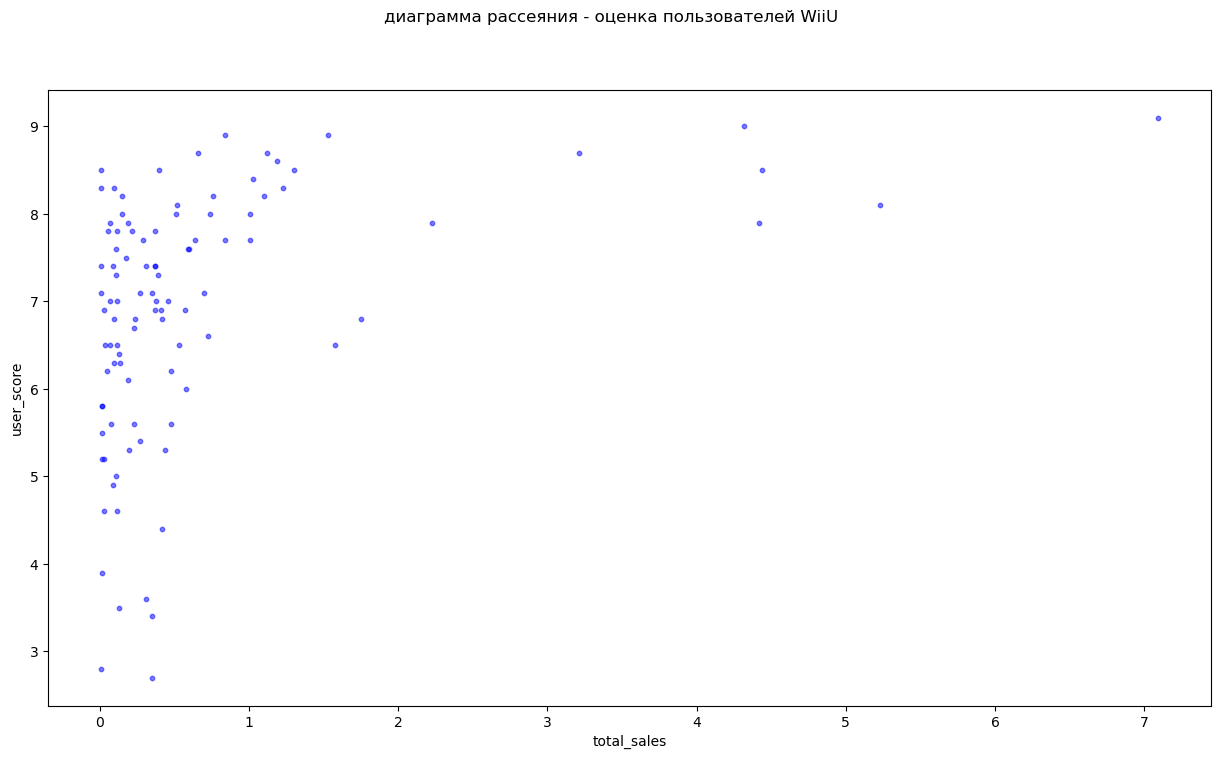

In [74]:
top_platforms = ['X360', 'PC', 'XOne', 'PS3', 'WiiU']
for platform in top_platforms:
    actual_data.query('platform == @platform and user_score >= 0').groupby('platform').plot(kind='scatter',
        y='user_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 10 , title ='диаграмма рассеяния - оценка пользователей ' + platform)

In [75]:
top_platforms = ['X360', 'PC', 'XOne', 'PS3', 'WiiU']
for platform in top_platforms:
    print (platform , actual_data.query('platform == @platform and user_score >= 0').user_score.corr(data.total_sales))

X360 0.006163978646213359
PC -0.12186747630735571
XOne -0.06892505328279418
PS3 -0.005143522887113829
WiiU 0.40021902021486194


**Насколько мы можем заметить, по другим не менее популярным платформам ситуация не сильно отличается от тех, что мы брали по Ps4**
<li> Корреляция между отзывами критиков и продажами по 5 взятым популярным платформам и ps4 примерно одинковая. Она есть, но слабая.
<li> Немного отличаются же данные по корреляции между отзывами пользователей и продажами. Если у ps4 ее вообще не было, то у 2 из 5 взятых платформ она есть, но слабая. Здесь в положительную сторону выделяется платформа WiiU.

### Расспределение игр по жанрам

Рассмотрим распределение игр по жанрам, и посмотрим, выделяются какие-либо жанры по по цене. Построим для этого ящик с усами по жанрам.

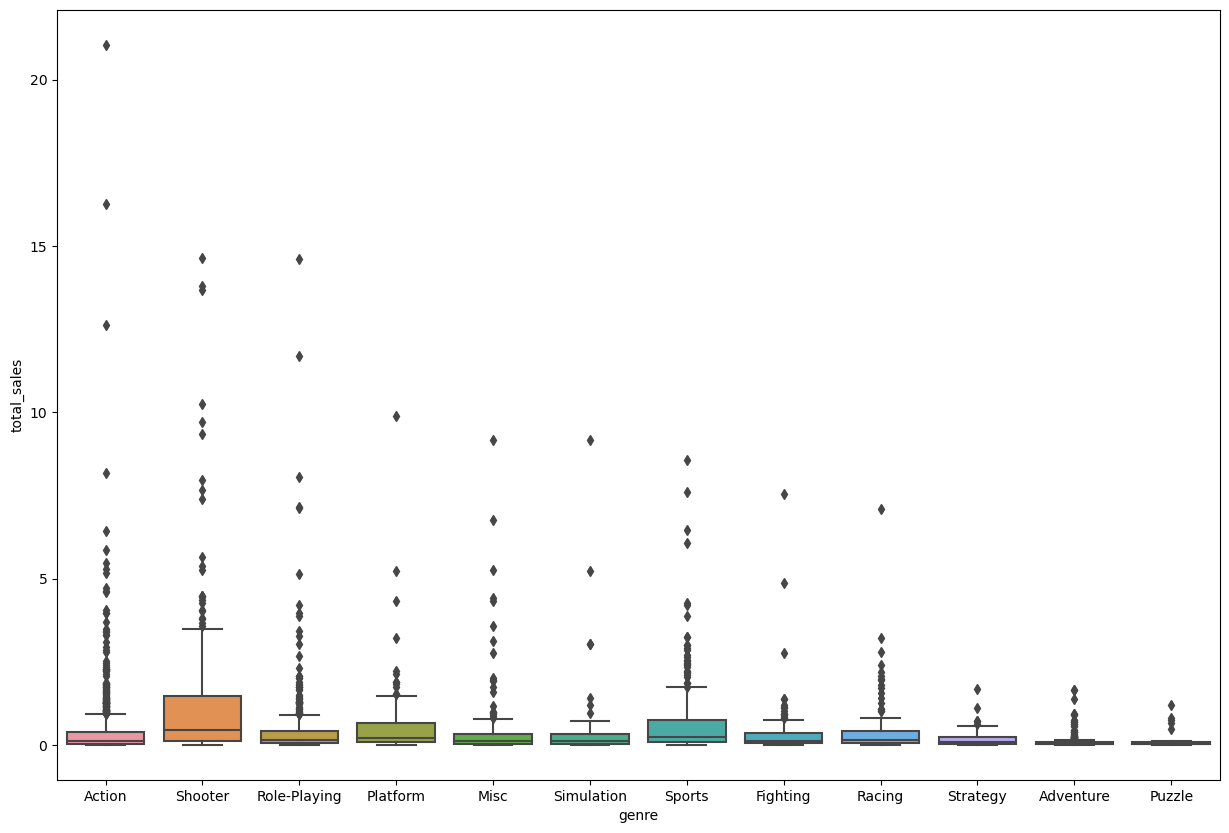

In [76]:
plt.figure(figsize = (15,10))
seaborn.boxplot(data = actual_data, x = "genre", y= 'total_sales', );

Судя по данному графику можно сделать несколько выводов:
<ol>
    <li> Жанр экшн и ролевые игры по прадажам имеют не очень большой размах, но в этом жанре достаточно много игр, которые выходят за пределы нормальных значений и продаюся с больших относительно других игр количествах
    <li> Жарнр шутер имеет самый большой межквантильный размах и пределы нормальных значений, да и игр, которые выходят за эти рамки и продаются больше чем средняя игра в жанре шутер достаточно много.
    <li> Также хорошо себя показвают игры в жанре спорт, в нем также содержится достаточно большое количество тайтлов, которые продавались больше чем игры проданные в среднем
    <li> Куда хуже по продажам показывают себя такие жанры как "Adventure" и "Puzzle" 

## Составление портрета пользователя каждого из регионов

### Сравним самые популярные плтатформы по регионам

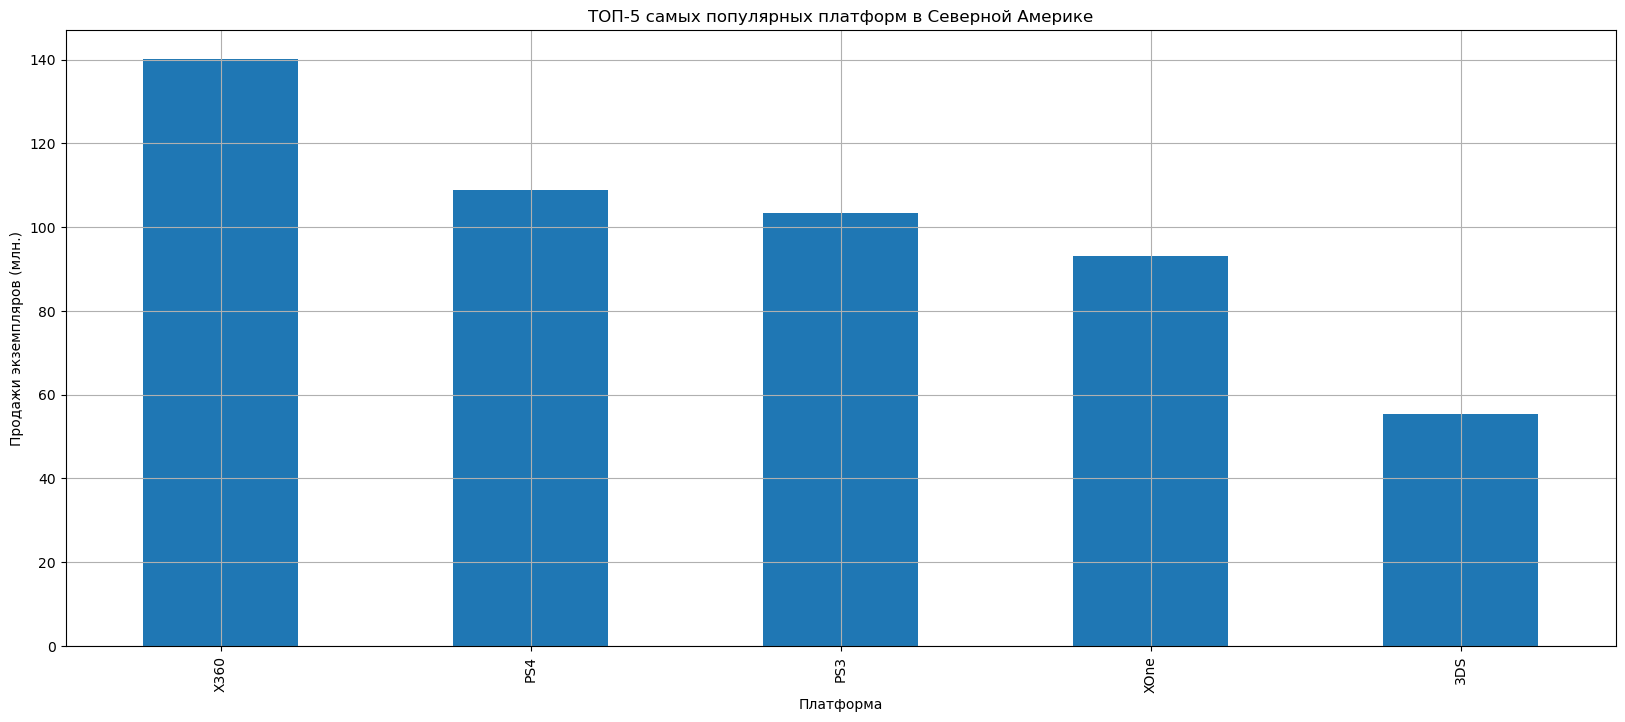

In [77]:
platform_na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_na.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Как ни странно, для Американских геймеров на первом месте Xbox360, произведенная в Америке. В середине находятся платформы японского происхождения. Замыкают пятерку лидеров набирающая популярность XBoxOne и уже угасающая, но безумно популярная в свое время Nintendo 3DS

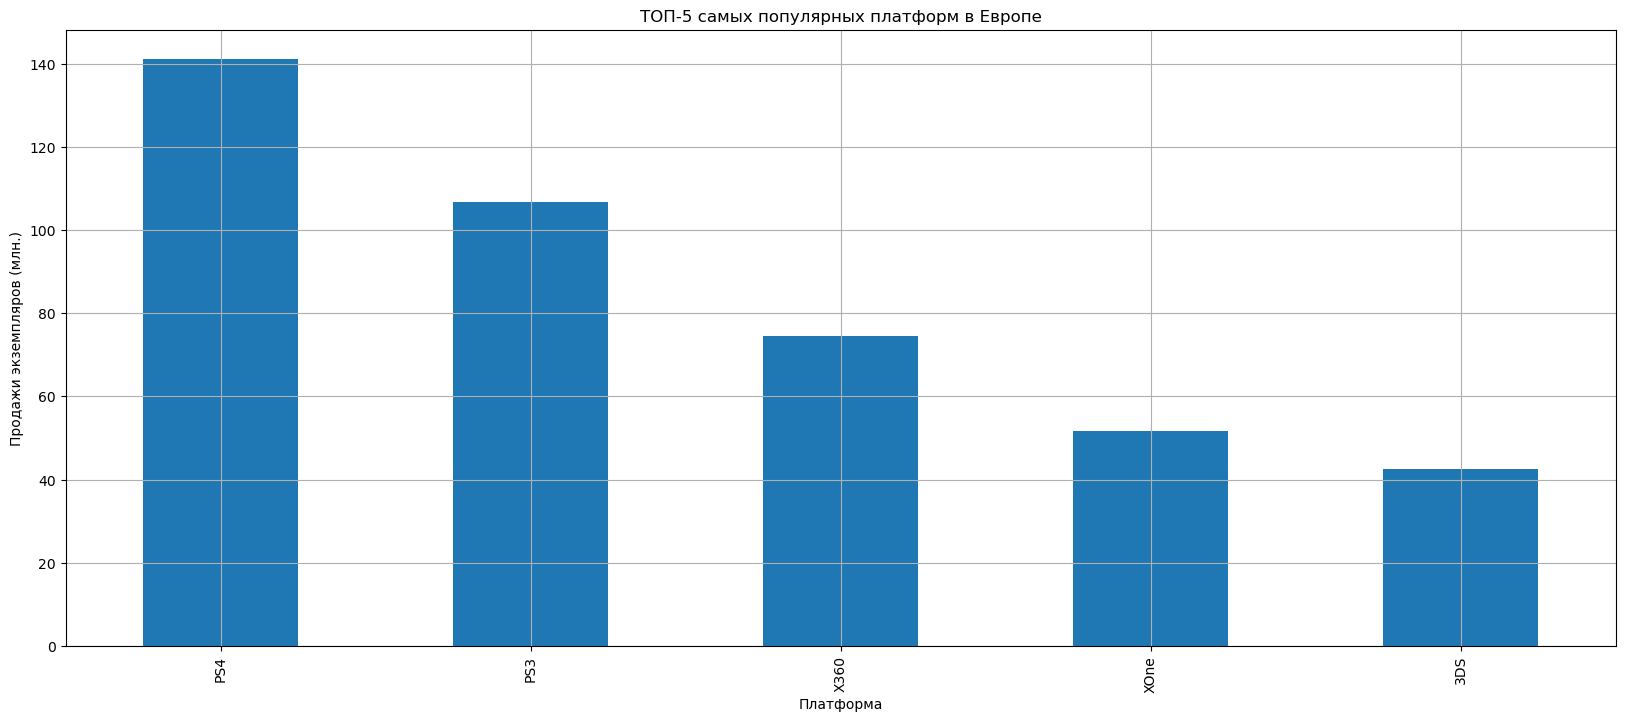

In [78]:
platform_eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_eu.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Европейские же геймеры отдают свое предпочтение больше японским консолям.

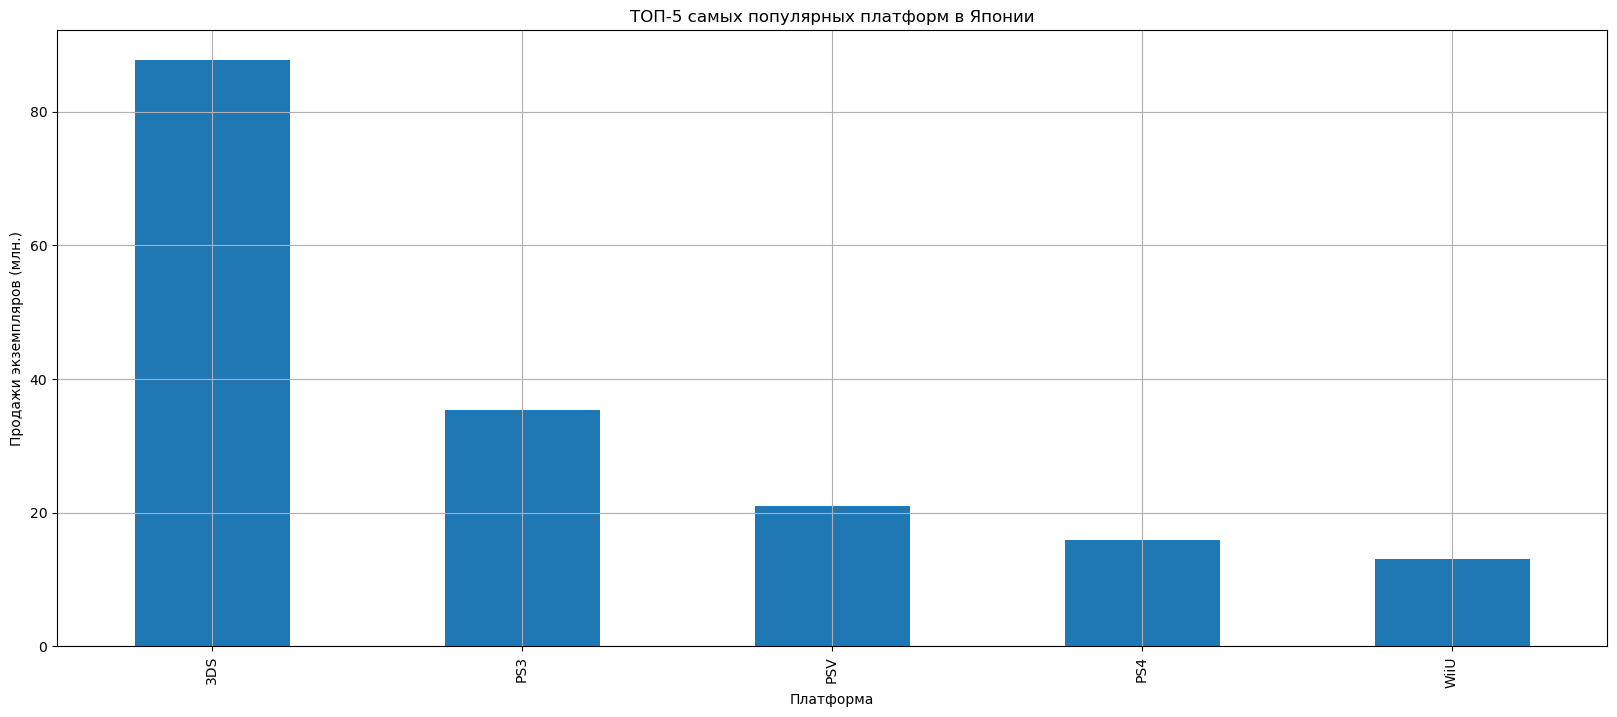

In [79]:
platform_jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_jp.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

А вот японцы радикальны в своих предпочтениях и отдают свое предпочтение консолям отечественного производства.

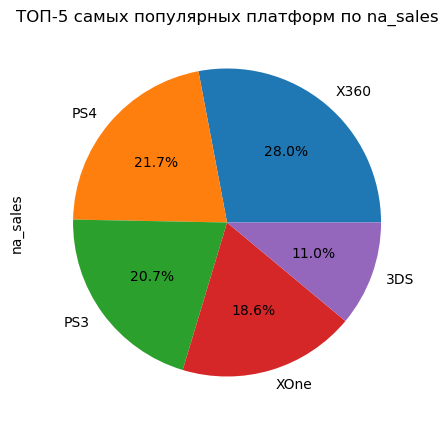

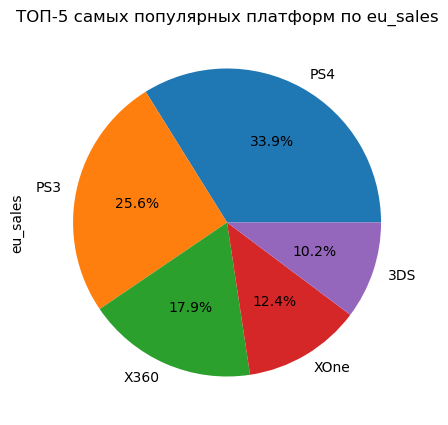

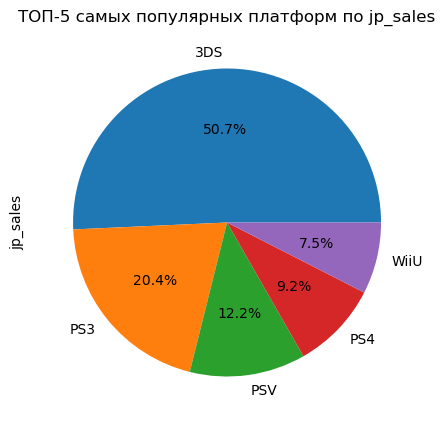

In [80]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    region_platgorm = actual_data.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    region_platgorm.plot(kind = 'pie', figsize=(5,5),autopct='%1.1f%%', title ='ТОП-5 самых популярных платформ по ' + region)
    plt.show()

### Рассмотрим самые популярные жанры по каждому из регионов

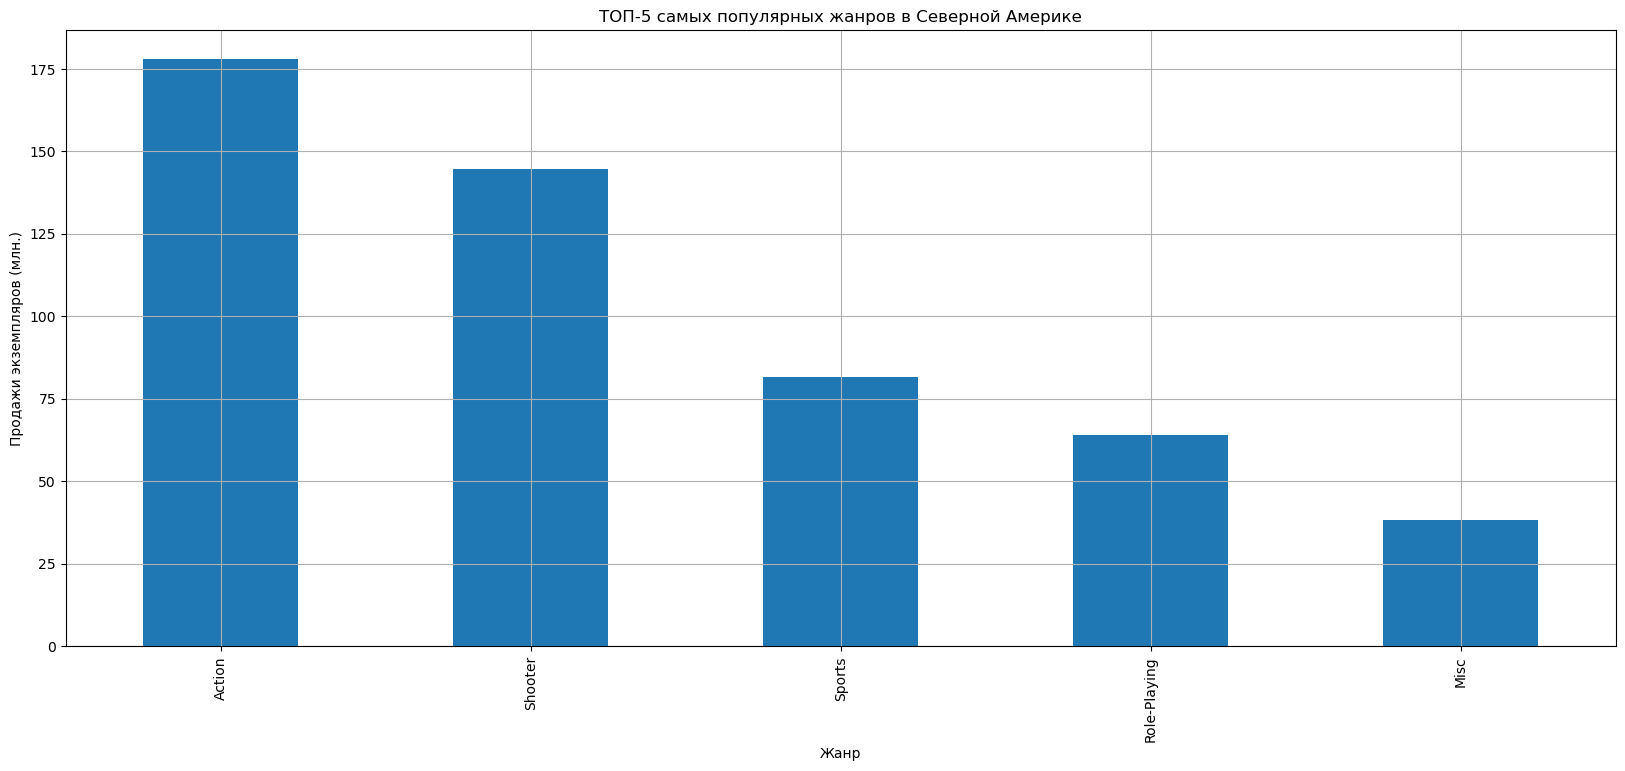

In [81]:
platform_na = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_na.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

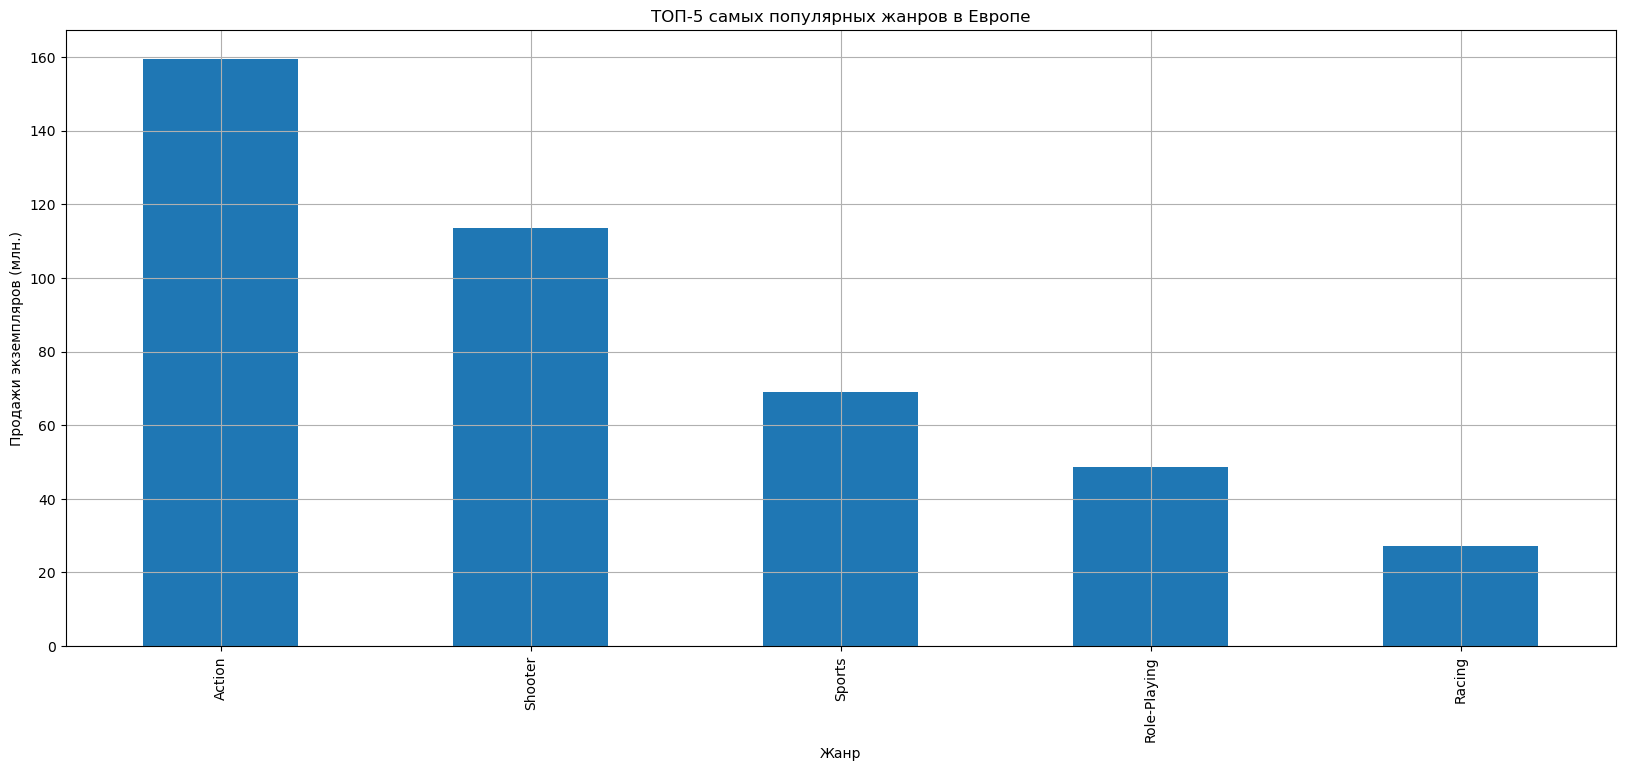

In [82]:
platform_eu = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_eu.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

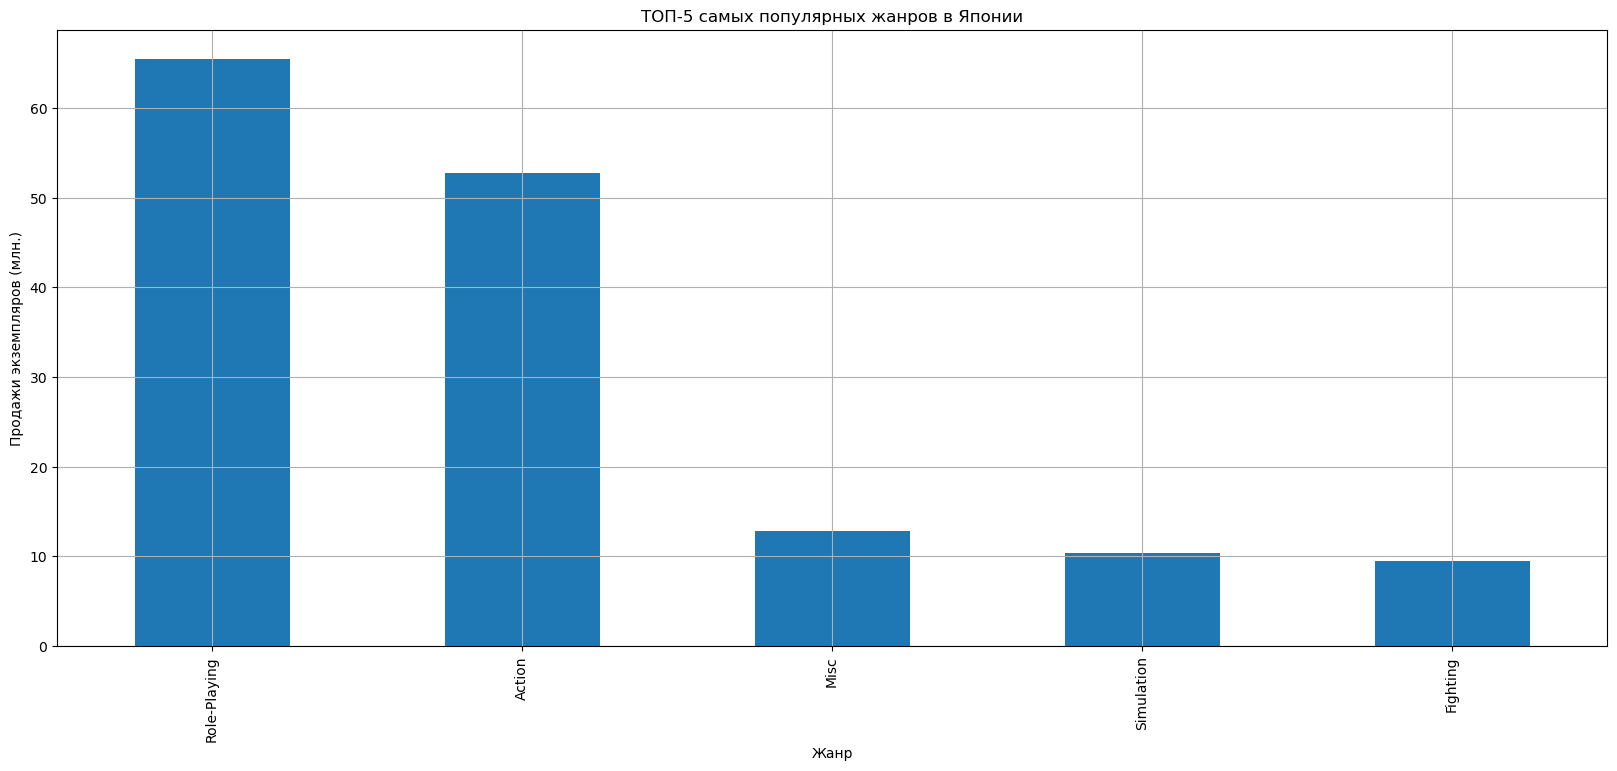

In [83]:
platform_jp = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_jp.plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

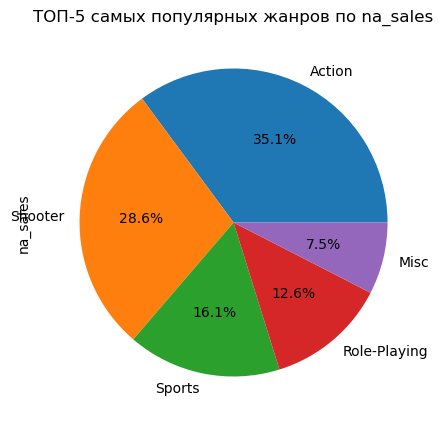

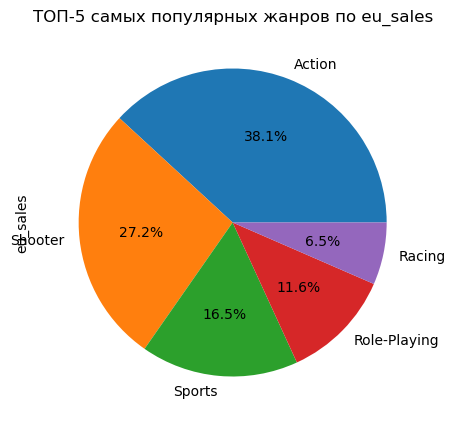

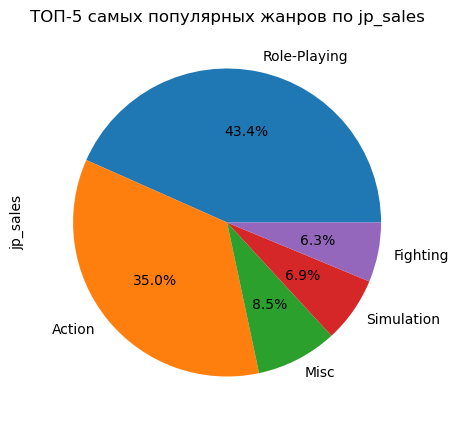

In [84]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    region_platgorm = actual_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    region_platgorm.plot(kind = 'pie', figsize=(5,5),autopct='%1.1f%%', title ='ТОП-5 самых популярных жанров по ' + region)
    plt.show()

Можно проследить за тем, что предпочтения Американских и Европейских геймеров почти полностью совпадает. В Японии же лидирует жанр ролевых игр. Что весь логично, ведь Японский геймдейв преуспел в этом жанре, а большинство хороших тайтлов не переводят на иностранные языки, поэтому до гемеров из других регионов они может и доходят, но на японском языке, что мешает прохождению и получению удовольствя от игры

### Рассмотрим, влияет ли рейтинг данный ESRB на продажи по регионам

Ранее, на этапе предобработки данных мы увидели, что неопредененных рейтингов от ESRB было достаточно много. Предполагаю, что эти данные будут мешать нам при проведении аналитики. Предлагаю избавиться от этих данных.

In [85]:
ESRB_positive = actual_data.query('rating != "undefined"')

Внесем немного справочной иноформации для понимания ранжирования игр:
<oi>
    <li> E -  («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.
    <li> T -  («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
    <li> M -  («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
    <li> E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
    <li> EC - («Early childhood») — «Для детей младшего возраста»
    <li> AO -  («Adults Only 18+») — «Только для взрослых»
    <li> RP - («Rating Pending») — «Рейтинг ожидается»

Теперь рассмотрим, влияют ли рейтинги на продажи

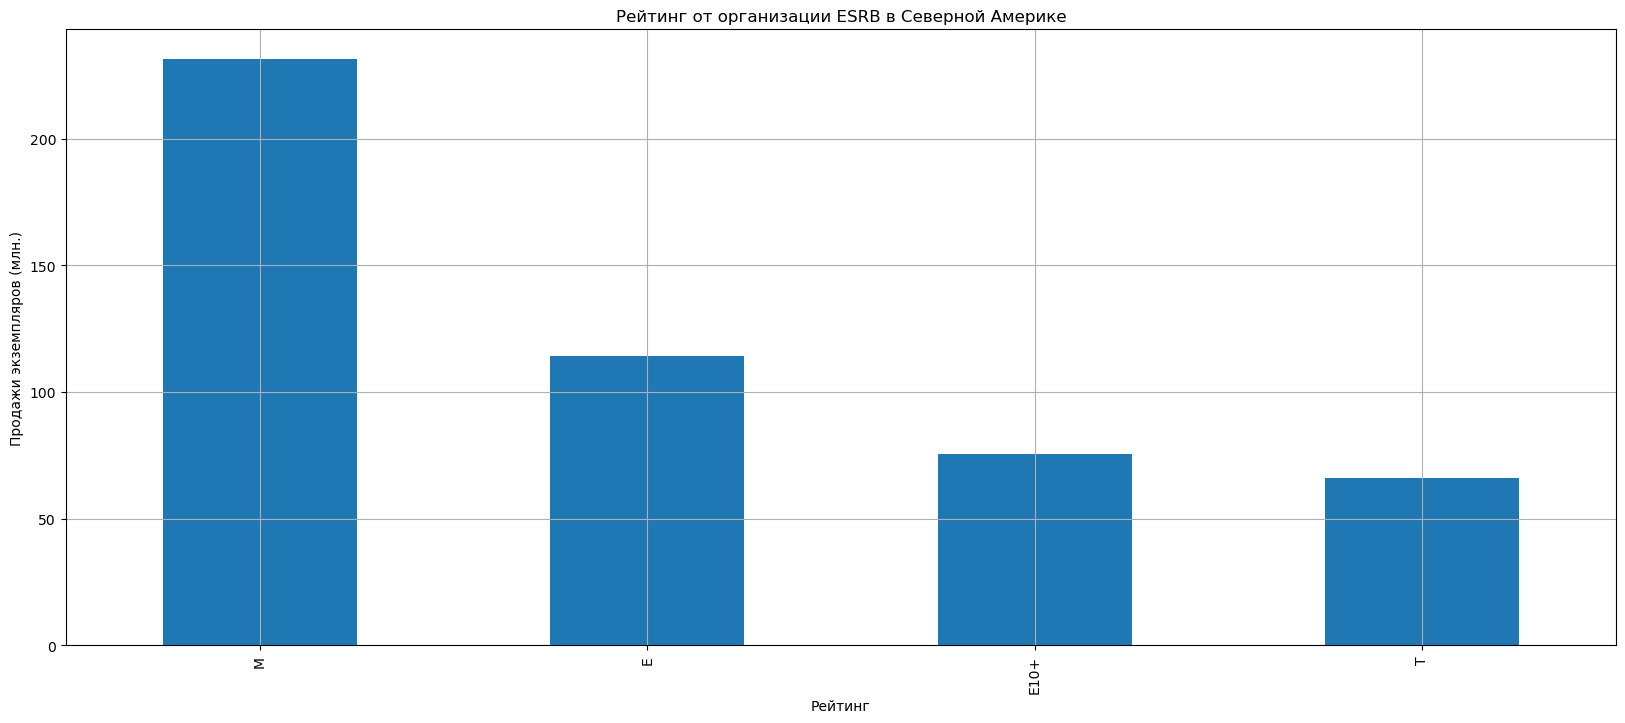

In [86]:
rating_na = ESRB_positive.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

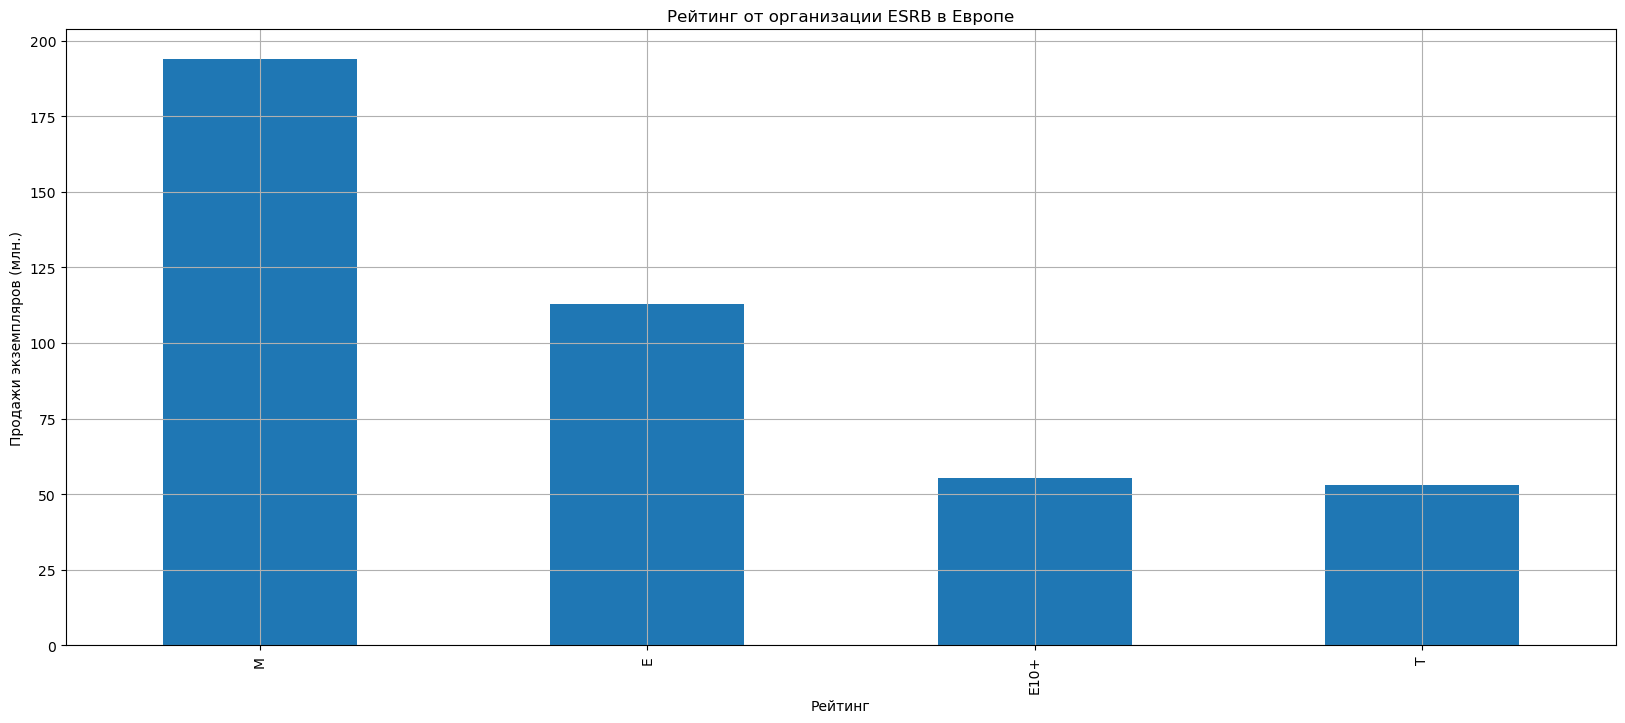

In [87]:
rating_eu = ESRB_positive.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

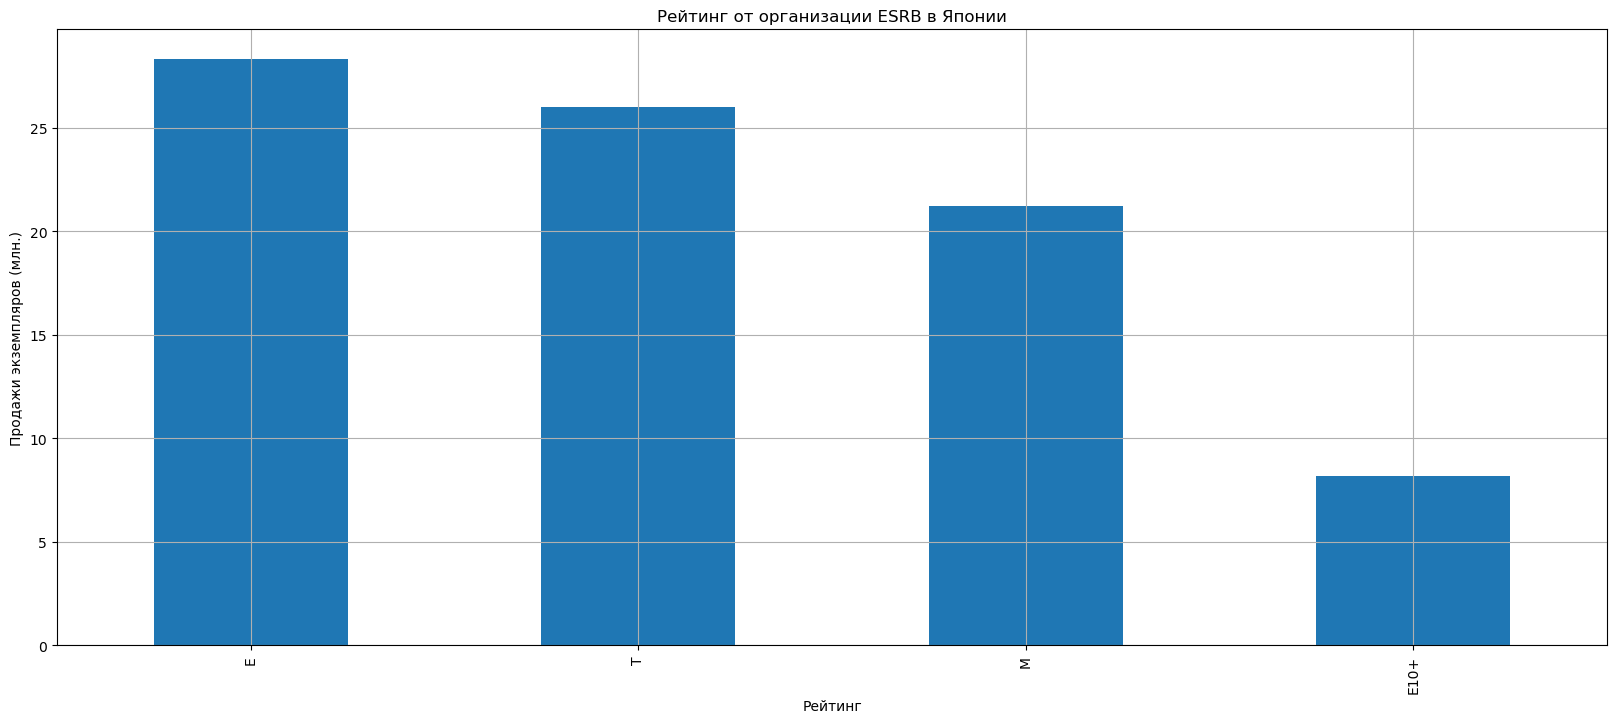

In [88]:
rating_jp = ESRB_positive.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Ситуация примерно как с жанрами. У Европы с Америкой предпочтения по рейтингам одинаковые. Выделяется Япония, в которой преобладают игры с жарном "Для всех". 

## Рассмотрим данные вместе с играми без  рейтинга

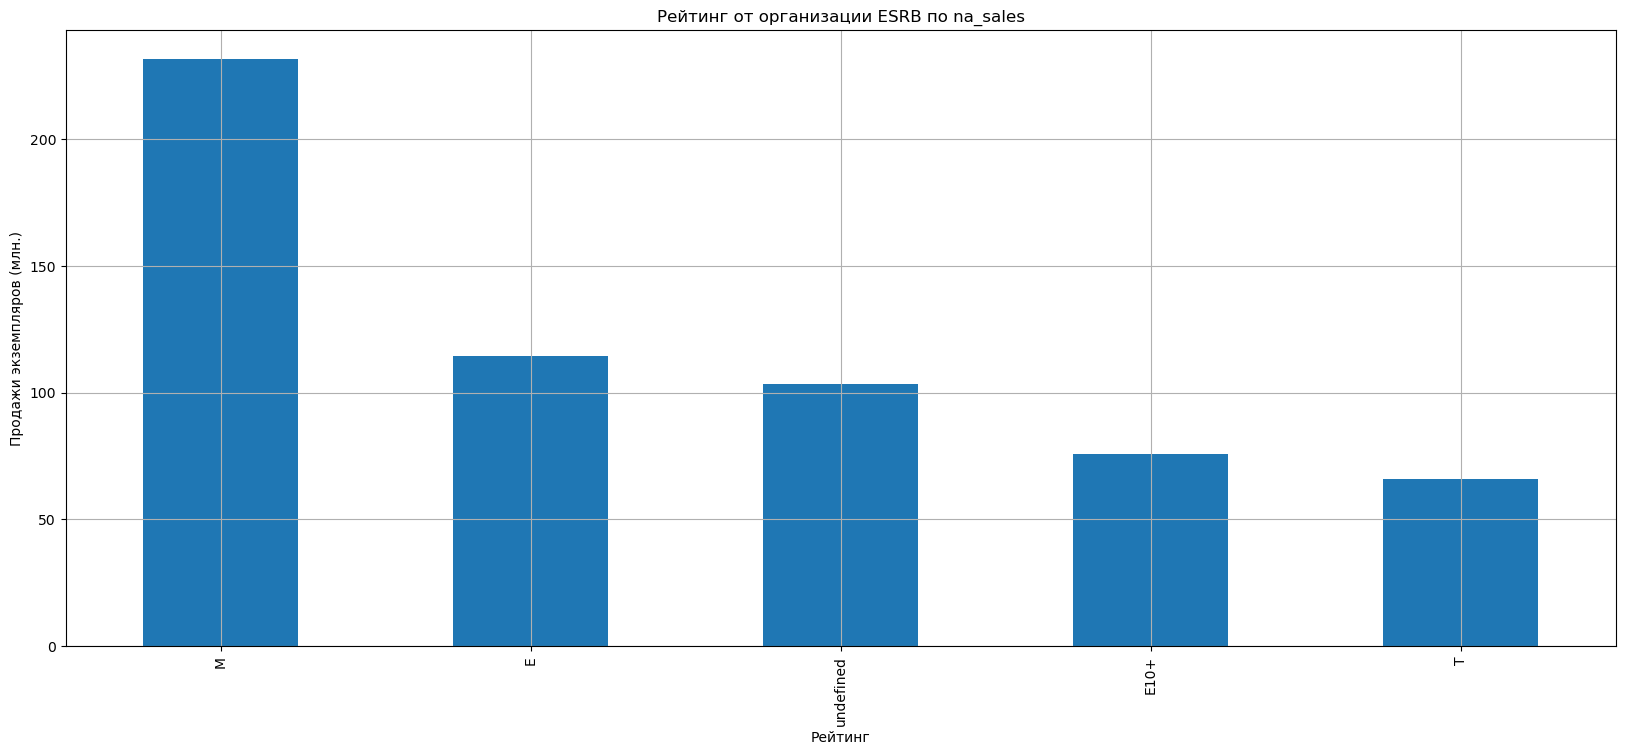

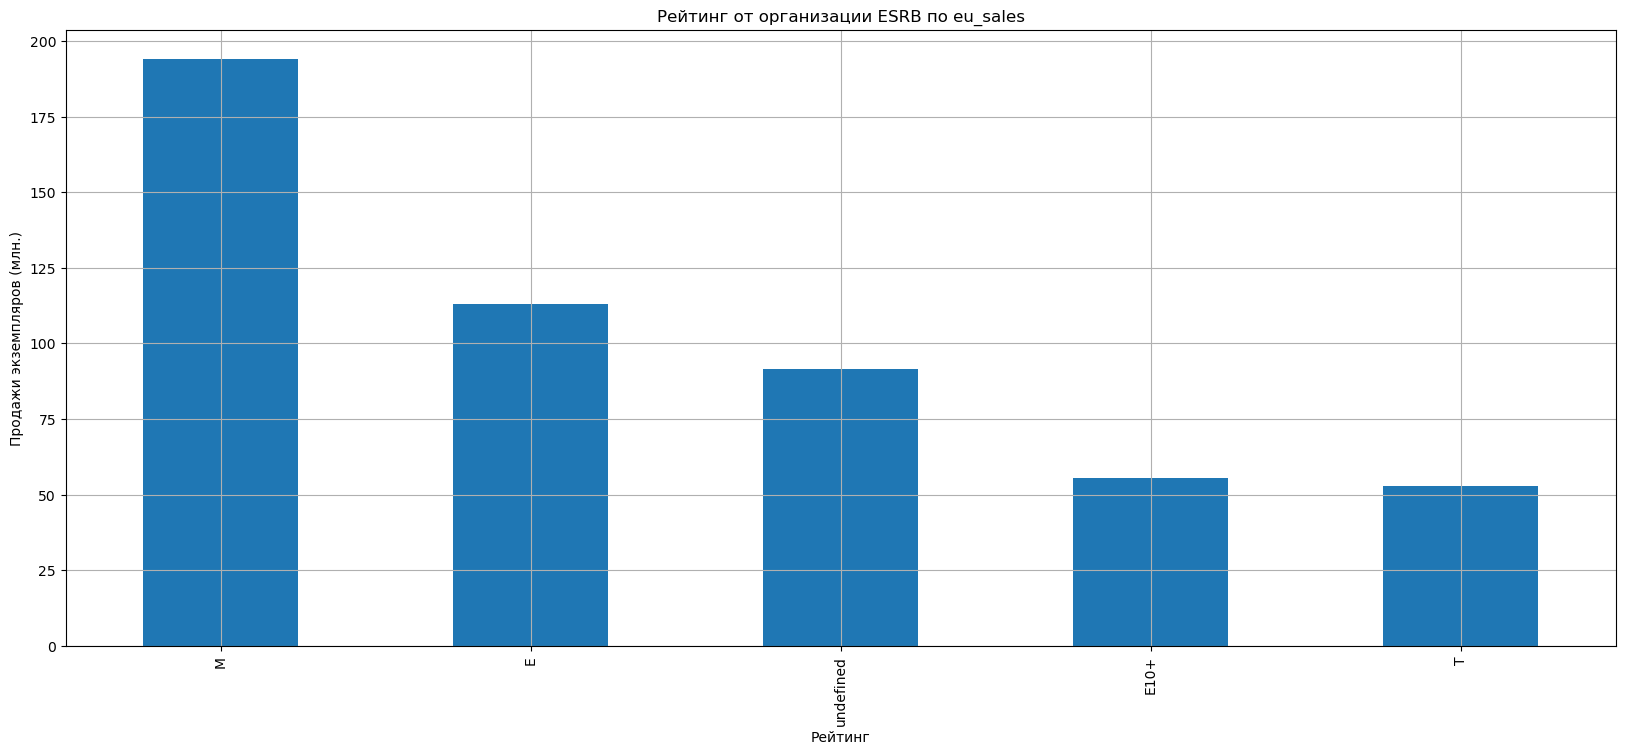

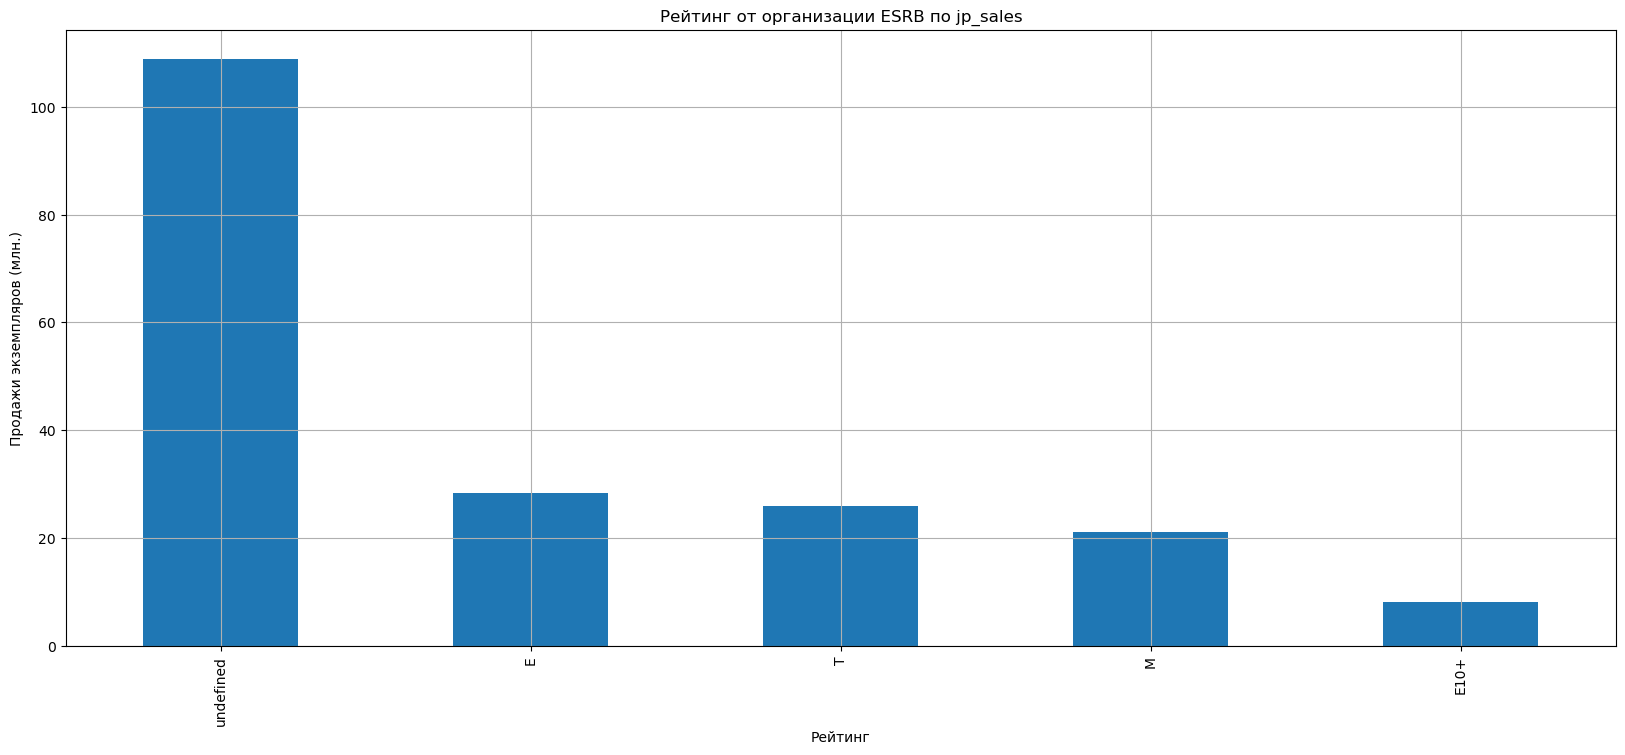

In [89]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    actual_data.groupby('rating')[region].sum().sort_values(ascending=False).plot(x = 'rating', y = regions, kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB по '+ region)
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи экземпляров (млн.)')
    plt.show()

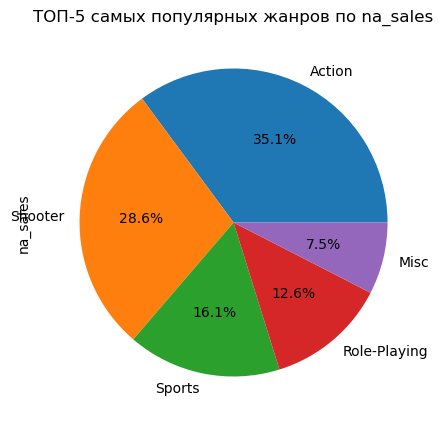

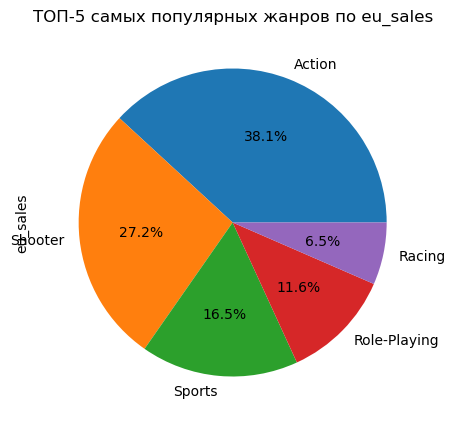

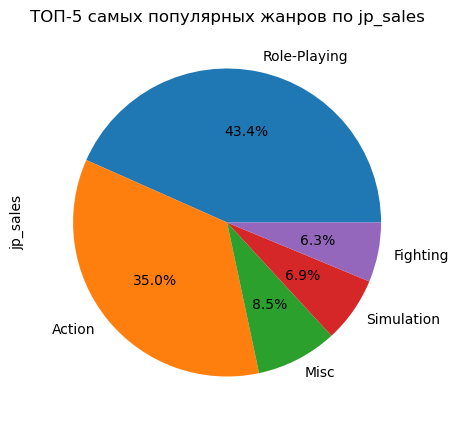

In [90]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    region_platgorm = actual_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    region_platgorm.plot(kind = 'pie', figsize=(5,5),autopct='%1.1f%%', title ='ТОП-5 самых популярных жанров по ' + region)
    plt.show()

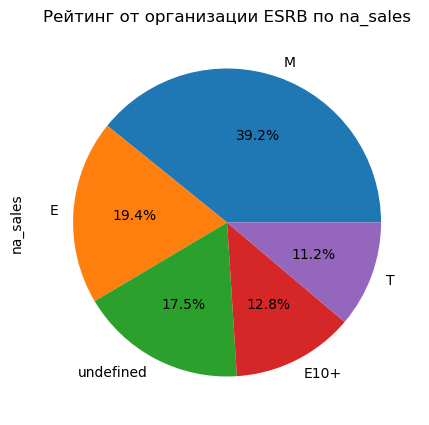

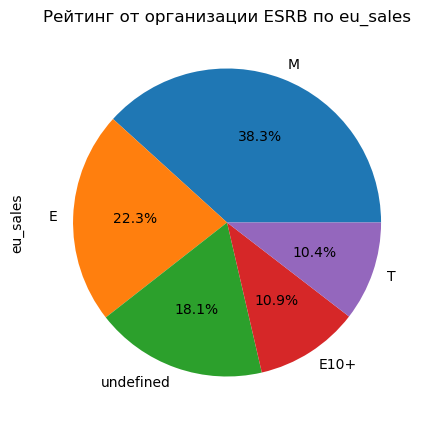

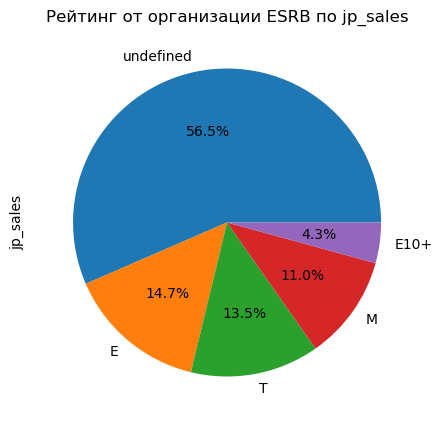

In [91]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    actual_data.groupby('rating')[region].sum().sort_values(ascending=False).plot(kind = 'pie', figsize=(5,5),autopct='%1.1f%%', title = 'Рейтинг от организации ESRB по '+ region)
    plt.show()

Если же брать даннные вместе с играми без рейтинга, общая картина немного менятся
    <ln> Статистика по Европе и Америке остается одинковой. На первом месте находятся игры с рейтингом "M", далее расположились  игры с рейтингом "Е", а на третьем месте игры, которым не присвоен рейтинг.
    <ln> В Японии вкусы по прежднему не совпадают со вкусами Европейцев и Американцев. На первом месте у них расположились игры, которым рейтинг от ESRB не был присвоен, далее идут игры, с рейтингом "Е" и "Т"
    <ln> Вероятно дело, действительно, в том, что ESRB маркирует игры для США и Канады, а Японцы играют в игры отечественного проихводства. Поэтому они и не промаркированы.

## Проверка гипотез

### Проверка гипотез о равенстве пользовательских рейтингов между платформами PC и Xbox One (XOne)

В качестве нулевой и альтернативной гипотезы принимаем:
<oi>
    <li> H0: средние рейтинги по платформам одинаковые
    <li> H1: средние рейтинги по платформам разные
<li> Для прверки гипотезы используем T-критерий Стюдента так как в данном случае выборки не зависят друг от друга
<li> Пороговое значение будет равно 0.05

In [95]:
# убираем значения, которые были пропусками
actual_data = actual_data[actual_data['user_score'] >= 0]

data_XOne = actual_data[actual_data['platform'] == 'XOne']
data_PC = actual_data[actual_data['platform'] == 'PC']

user_score_XOne = data_XOne['user_score']
user_score_PC = data_PC['user_score']
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
user_score_XOne,
user_score_PC)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**При повторной проверке актуальных данных и корректной фильтрации данных выяснилось, что гипотеза о равенстве пользовательских рейтингов между выбранными платформами можно подтвердить**

### Проверка гипотез о равенстве пользовательских рейтингов между жанрами Action (Экшн) и Sports (Спорт)

В качестве нулевой и альтернативной гипотезы принимаем:
<oi>
    <li> H0: средние рейтинги по жанрам одинаковые
    <li> H1: средние рейтинги по жанрам разные

<li> Для прверки гипотезы также  используем T-критерий Стюдента так как в данном случае выборки не зависят друг от друга
<li> Пороговое значение также будет равно 0.05

In [96]:
actual_data = actual_data[actual_data['user_score'] >= 0]

data_action = actual_data[actual_data['genre'] == 'Action']
data_sports = actual_data[actual_data['genre'] == 'Sports']

action_genre = data_action['user_score']
sports_genre = data_sports['user_score']
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
action_genre,
sports_genre)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


**А данная гипотеза даже после использования актуальных данных и корректной фильтрации данных также была опровергнута**

## Общий вывод:

Получив данные, была проделана большая работа по предобработке, исследовательскому анализу, составлению портрета регионов (Америка, Европа, Япония), были сформулированы и проверены гипотезы.
<li> Актуальным периодом для планирования кампании на следующие года был выбран период в 5 лет. В основном по причине стремительного развития геймдейва как такового. За весь прошедший период развития игры колоссально поменялись от 8-ми битных аркад до полноценных шедевров игровой индустрии с трехмерной графикой и полноценным сюжетом, которые увлекут геймеров ни на один десяток часов.
<li> Полноценным сроком жизни консолей (платформ за исключением PC) в среднем является примерно 10-11 лет, при чем платформе нужно некторое время, чтобы набрать обороты в плане выпускаемых на нее игр. Пиком популярности современных платформ является срок около 5 лет. Это весьма логично по причине того же технического прогресса. При планировании кампании эти данные обязательно стоит взять во внимание
<li> При планировании кампании стоит отдавать предпочтение таким платформам как ps4, XBox One, 3DS (для Японской аудитории) и PC как стабильно развивающиуюся платорму. В то же время стоит отказаться от таких платформ как Nintendo DS и PSP так как они уже устарели и спросом пользоваться не будут
<li> При соотношении результатов подсчета корреляции между ps4 и другими популярными платформами выяснилось, что разница минимальна. Выделяется только платформа WiiU с наибольшей, хоть и слабой корреляцией между продажами и оценками пользователей.  
<li> При выборе жанра стоит делать упор на Экшн, Шутер и Ролевые (в большинстве на Японскую аудиторию). 
<li> При составлении портрета пользовательских вкусов по регионам мы выявили, что вкусы игроков из Америки и Европы поти полностью совпадают. Со вкусами Японских геймеров дела обстаят чуть иначе.
<li> Наиболее популярным рейтингом по оценке ESRB является рейтинг E - рассчитанный на всех. Это весьма логично, что самым популярным и продаваемыми играми являются игры рассчитанные на большую целевую аудиторию
<li> Выдвинутые гипотезы о эквивалентности пользовательских рейтингов платформ PC и XBox One и пользовательских рейтингов жанров Экшн и  Спорт были опровергнуты. Но после повтроной проверки гипотез и корректной фильтрации данных гипотеза о равенстве пользовательских рейтингов между платформами PC и Xbox One (XOne) подтвердилась, а гипотеза о пользовательских рейтингов между жанрами Action (Экшн) и Sports (Спорт) также осталась опровергнутой